### 6.5 정규화 선형회귀

- Ridge 회귀모형

    - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)$
    - 가중치 계수를 한꺼번에 축소시킴

- Lasoo 회귀모형

    - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$
    - 일부 가중치 계수가 먼저 0으로 수렴

- Elastic Net 회귀모형

    - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda_1 \sum_{j=1}^M | w_j | + \lambda_2 \sum_{j=1}^M w_j^2 \right)$

- 정규화 모형 장점
    -  회귀분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않는다
- 정규화의 의미
    - 정규화 제한조건: 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 같다



- fit_regularized 메서드 : Elastic Net 회귀모형의 모형계수 구하기

In [1]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    x = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * x) + np.random.randn(n_samples) * 0.1
    x = x[:, np.newaxis]
    return (x, y)


x, y = make_nonlinear()
dfx = pd.DataFrame(x, columns=['x'])
dfx = sm.add_constant(dfx)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfx, dfy], axis=1)

In [2]:
model = sm.OLS.from_formula(
    'y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)', data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939667
I(x ** 5)    49326.072553
I(x ** 6)   -78884.743085
I(x ** 7)    74538.645164
I(x ** 8)   -38453.132196
I(x ** 9)     8350.254987
dtype: float64

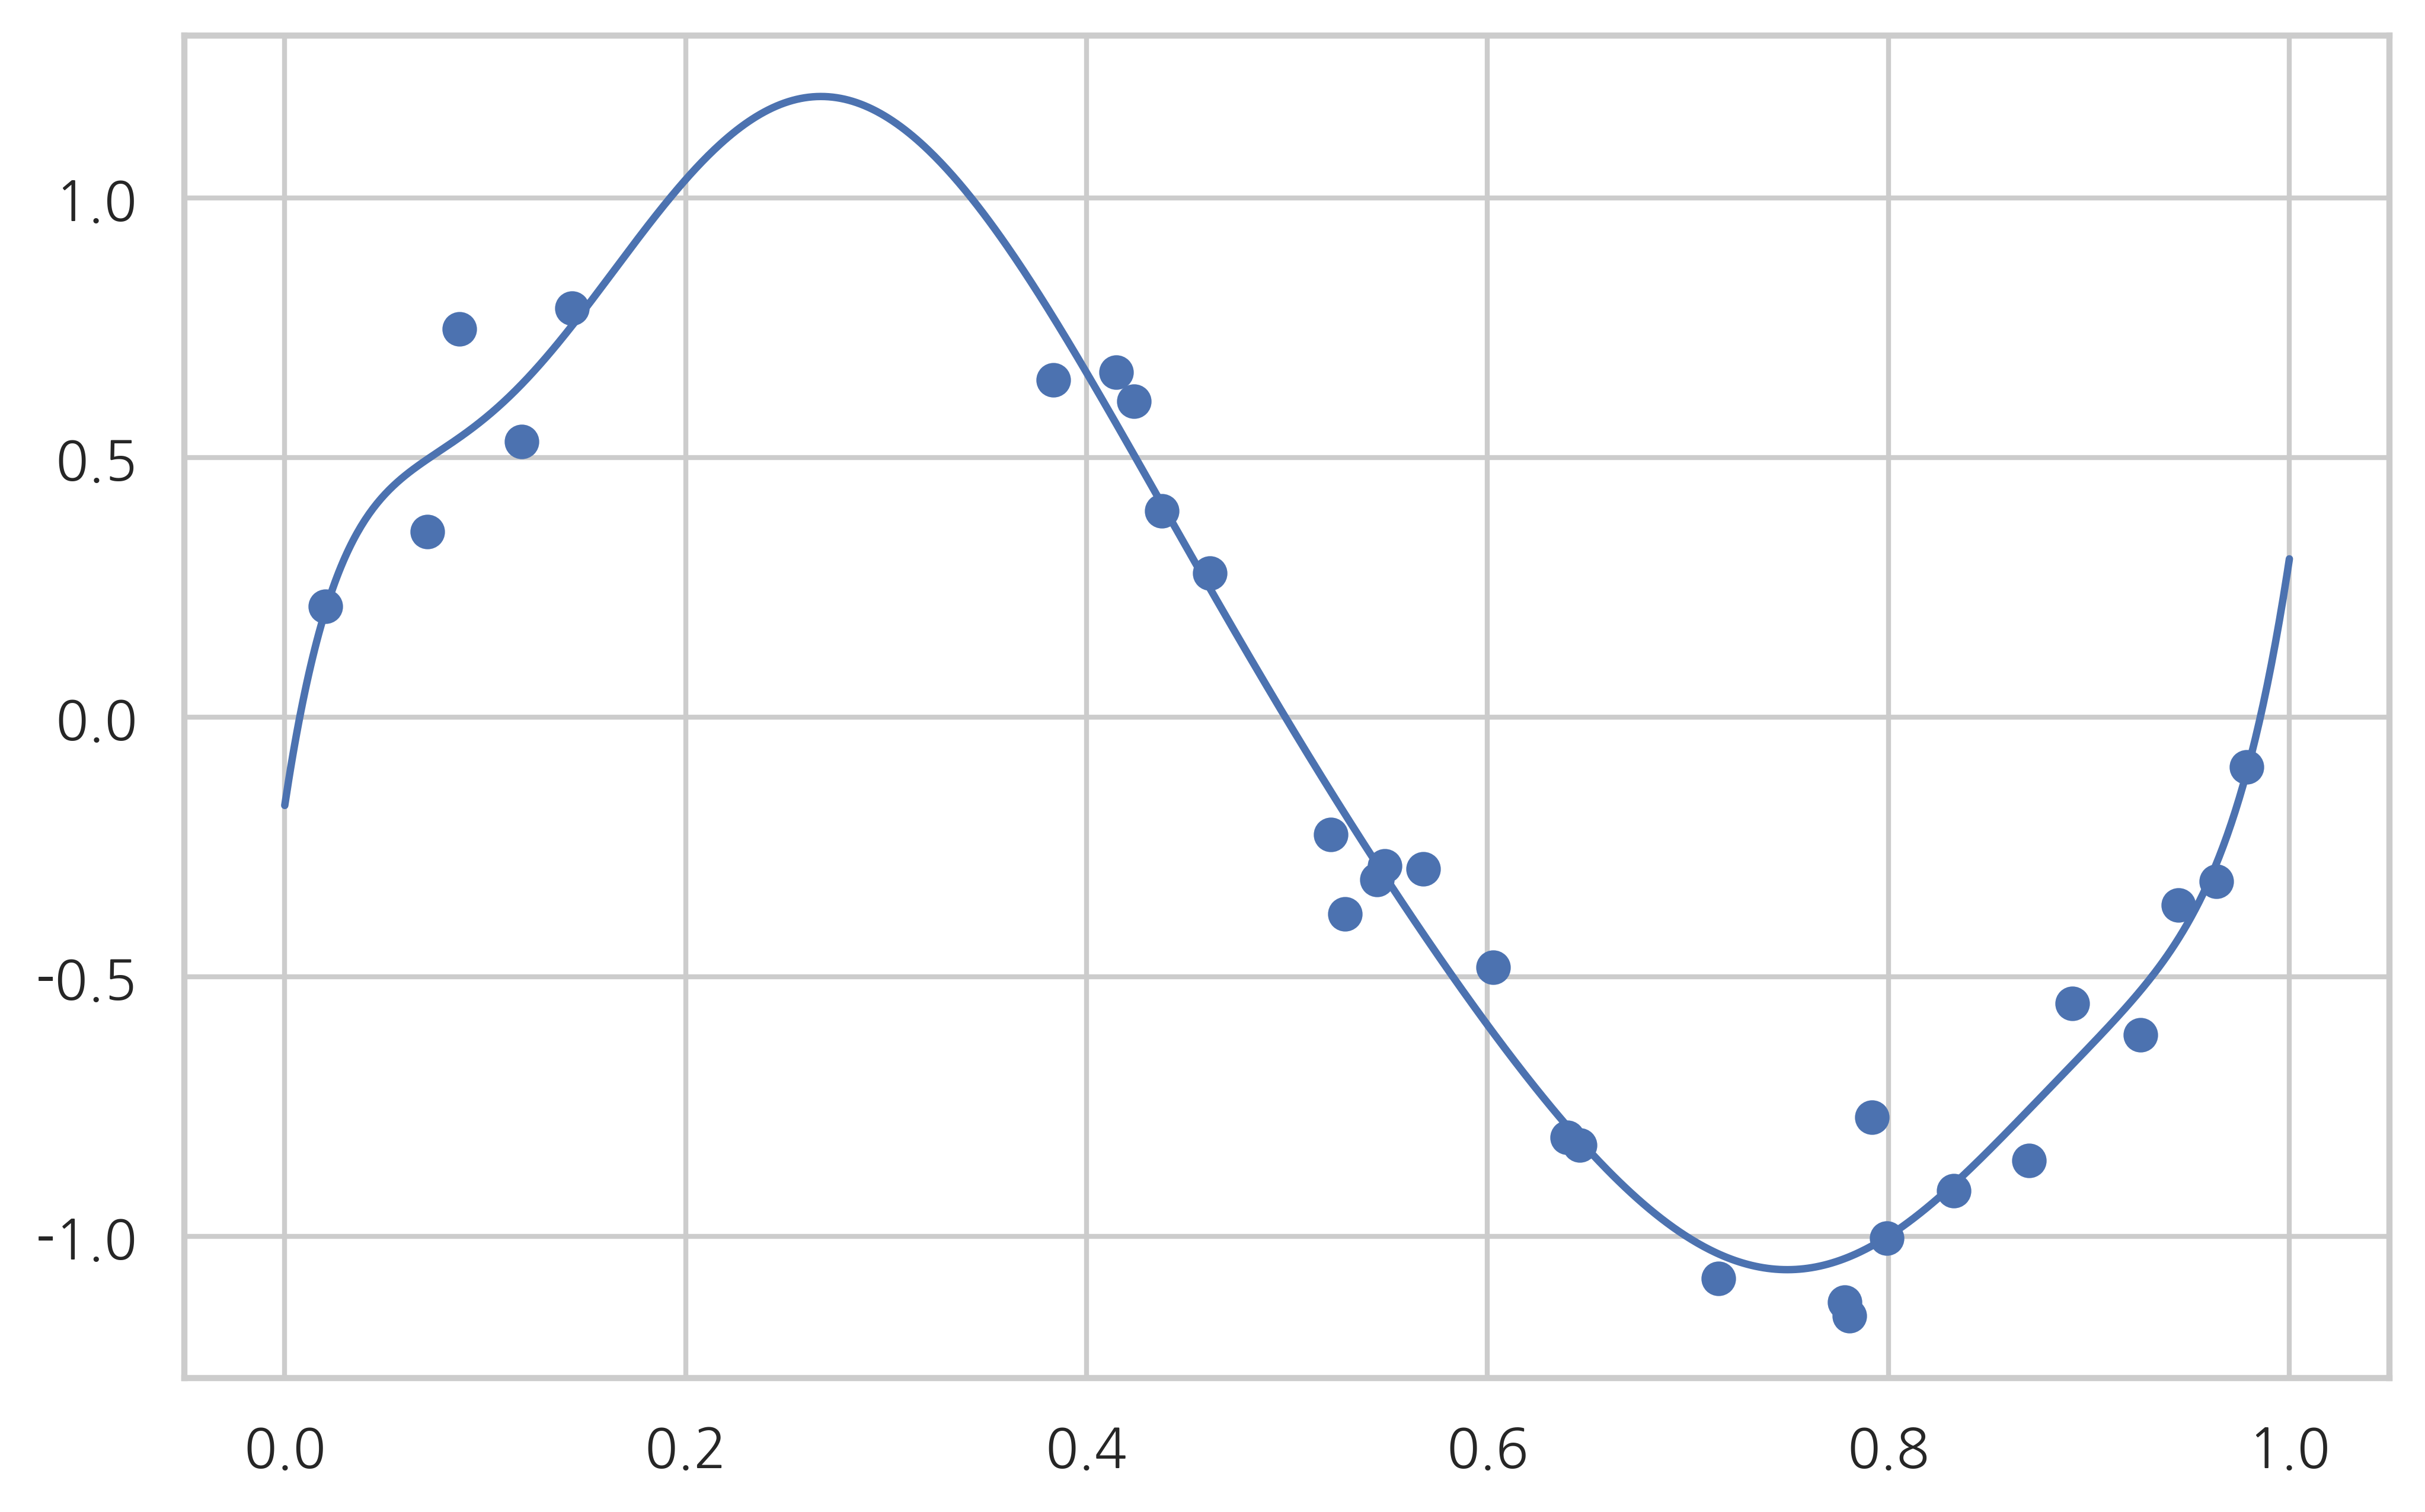

In [3]:
def plot_statsmodels(result):
    plt.scatter(x, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=['x'])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()


plot_statsmodels(result1)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


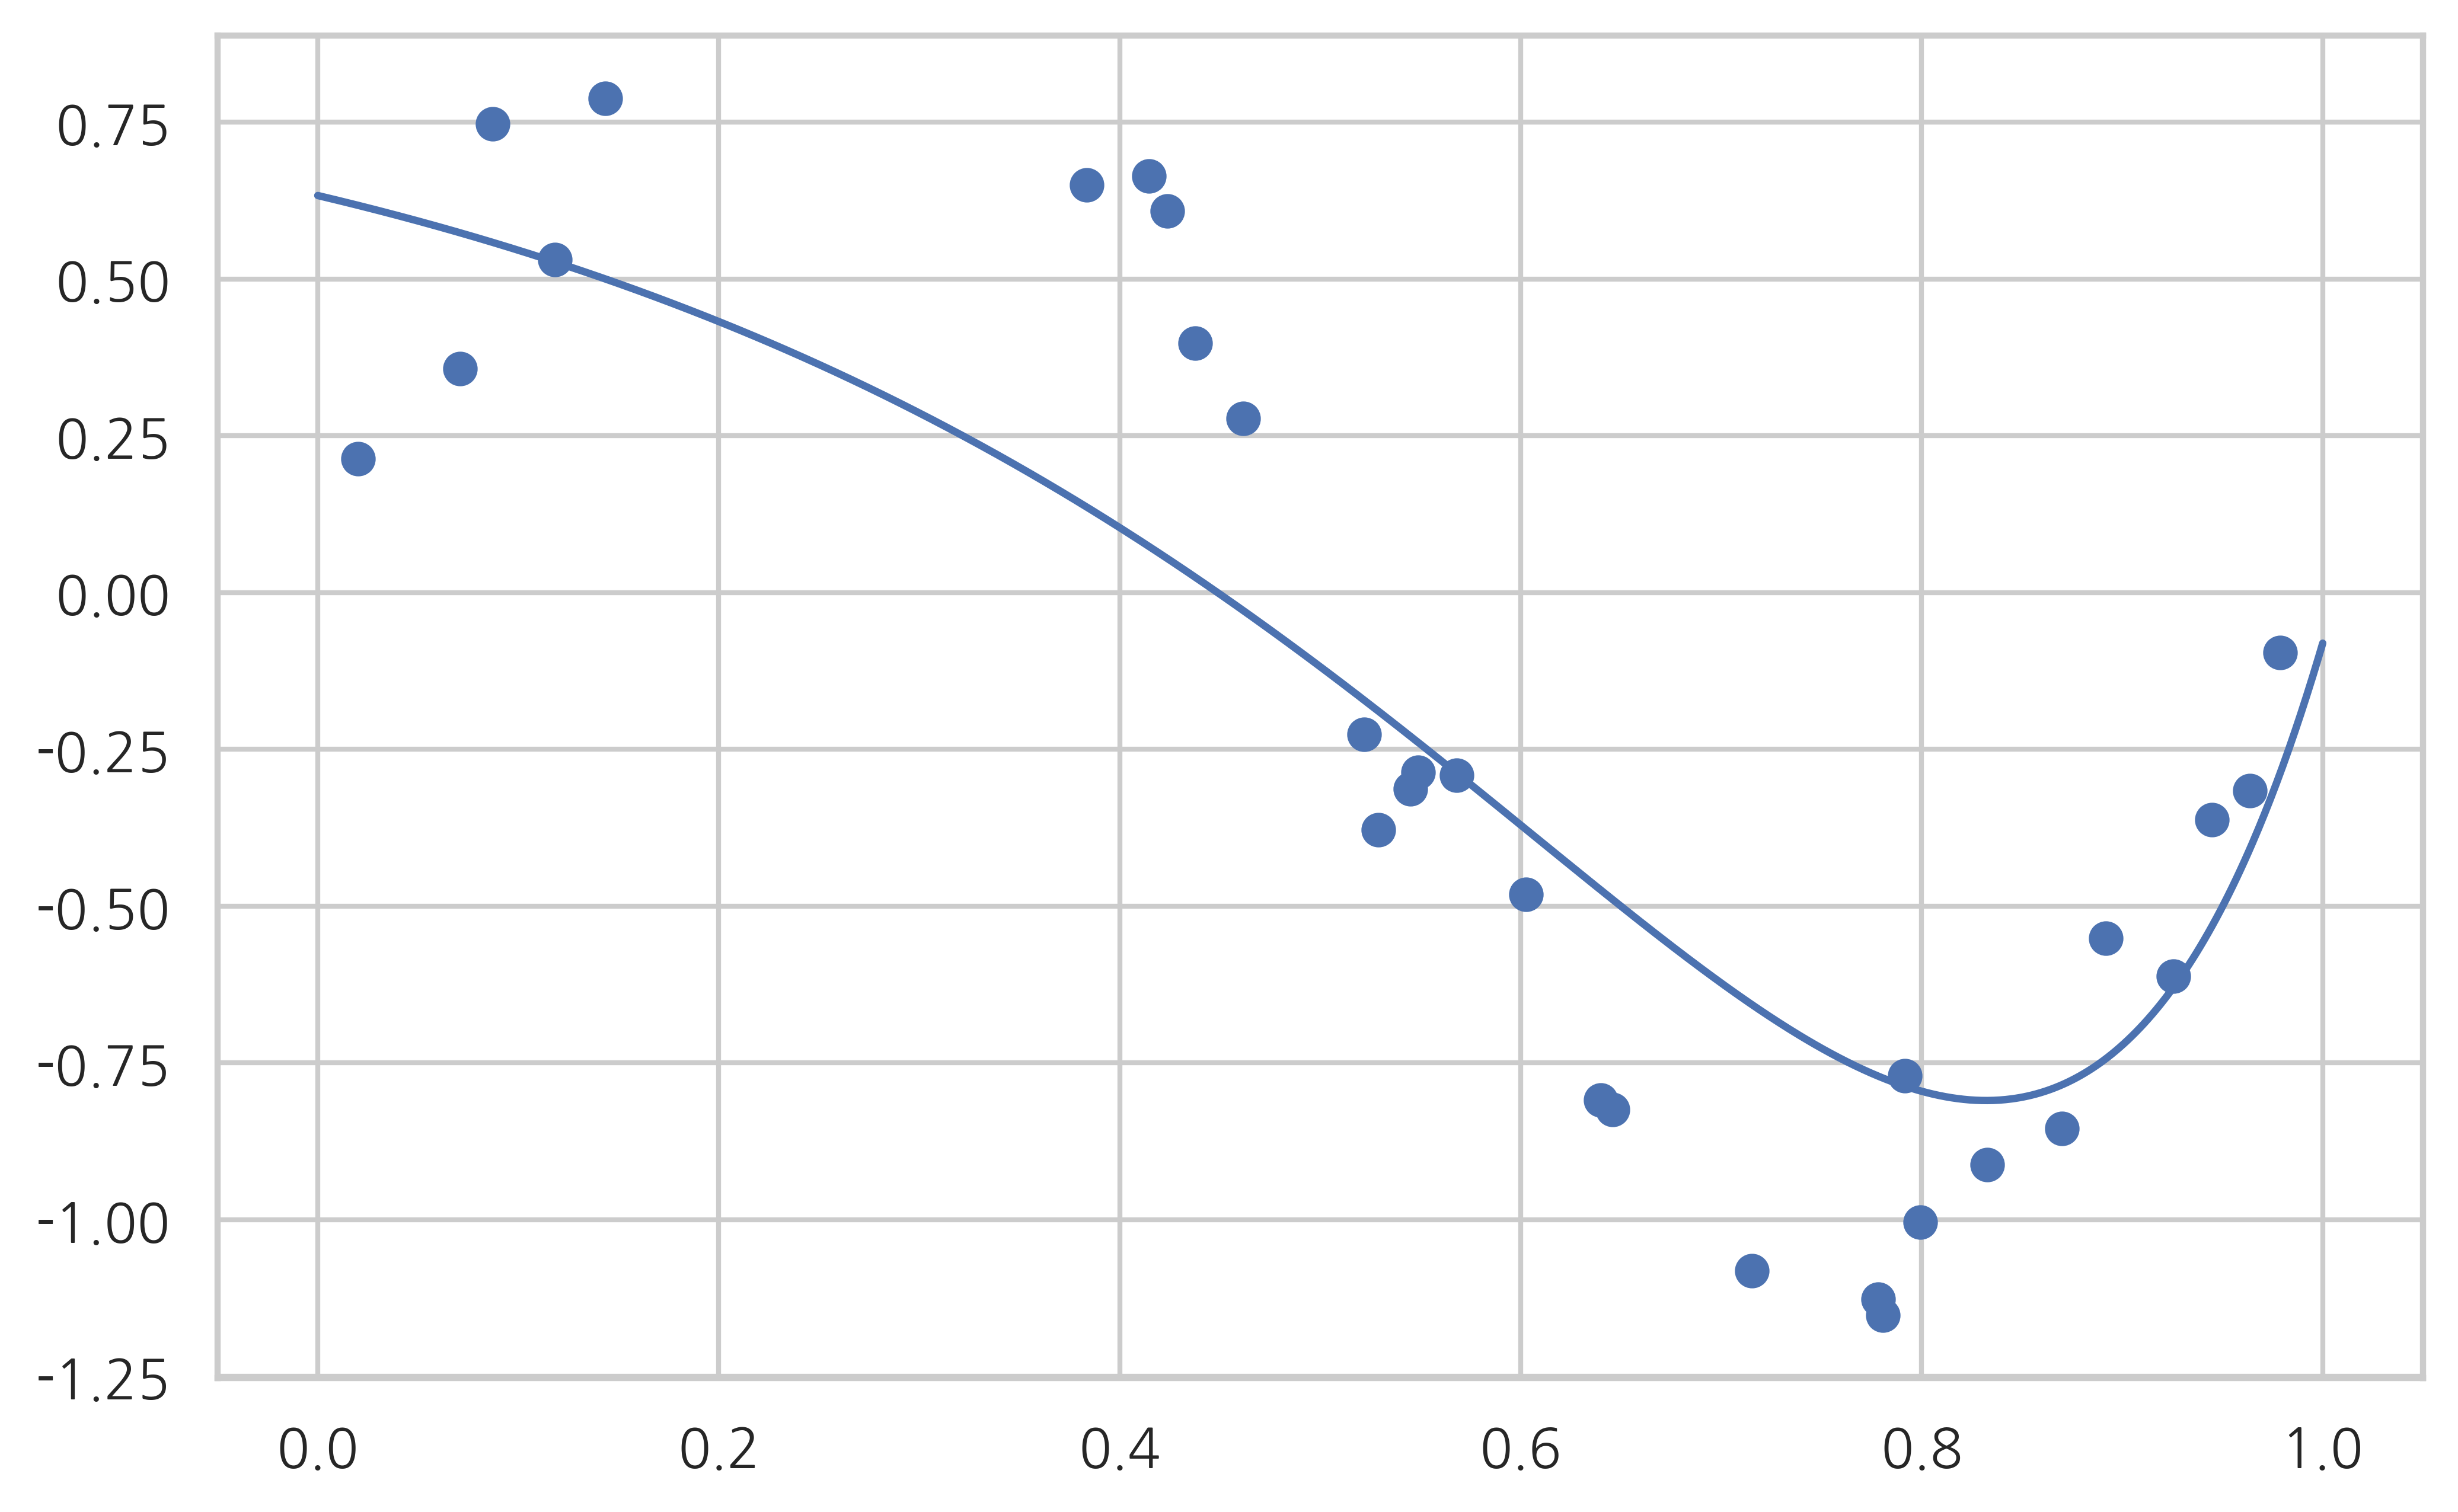

In [4]:
# Ridge 모형, L1_wt=0
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


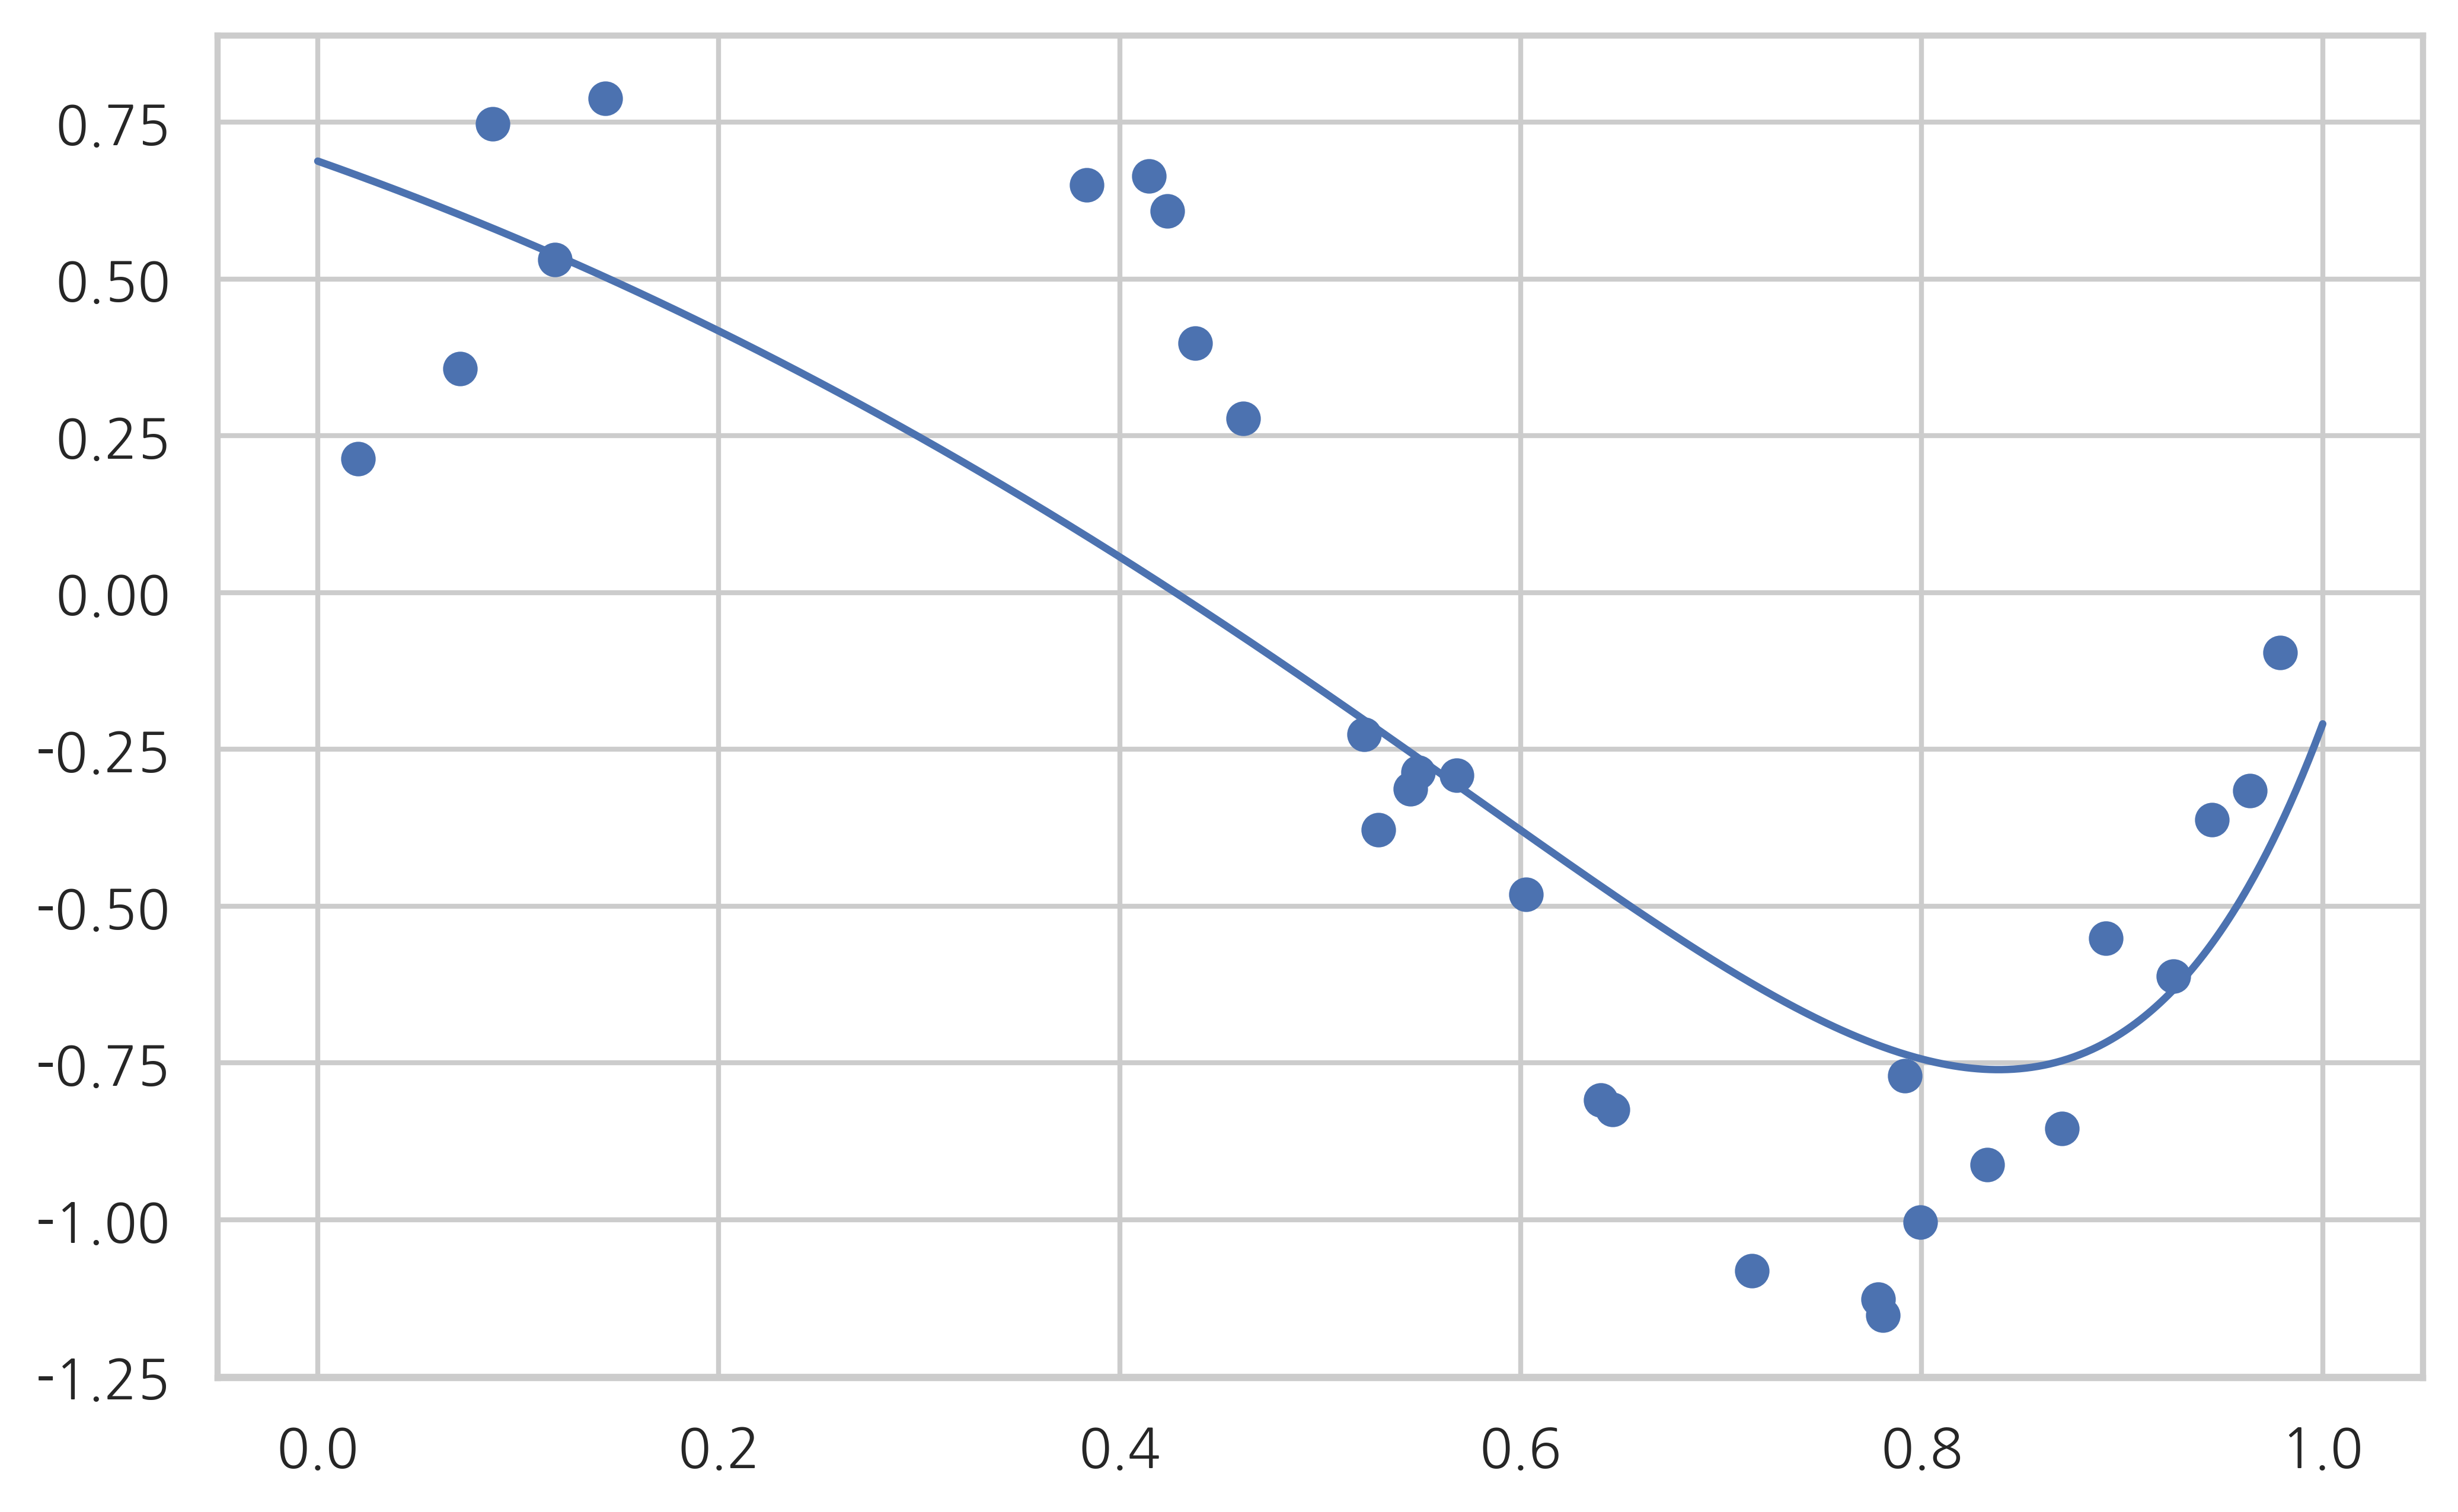

In [5]:
# Lasso 모형, L1_wt=1
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


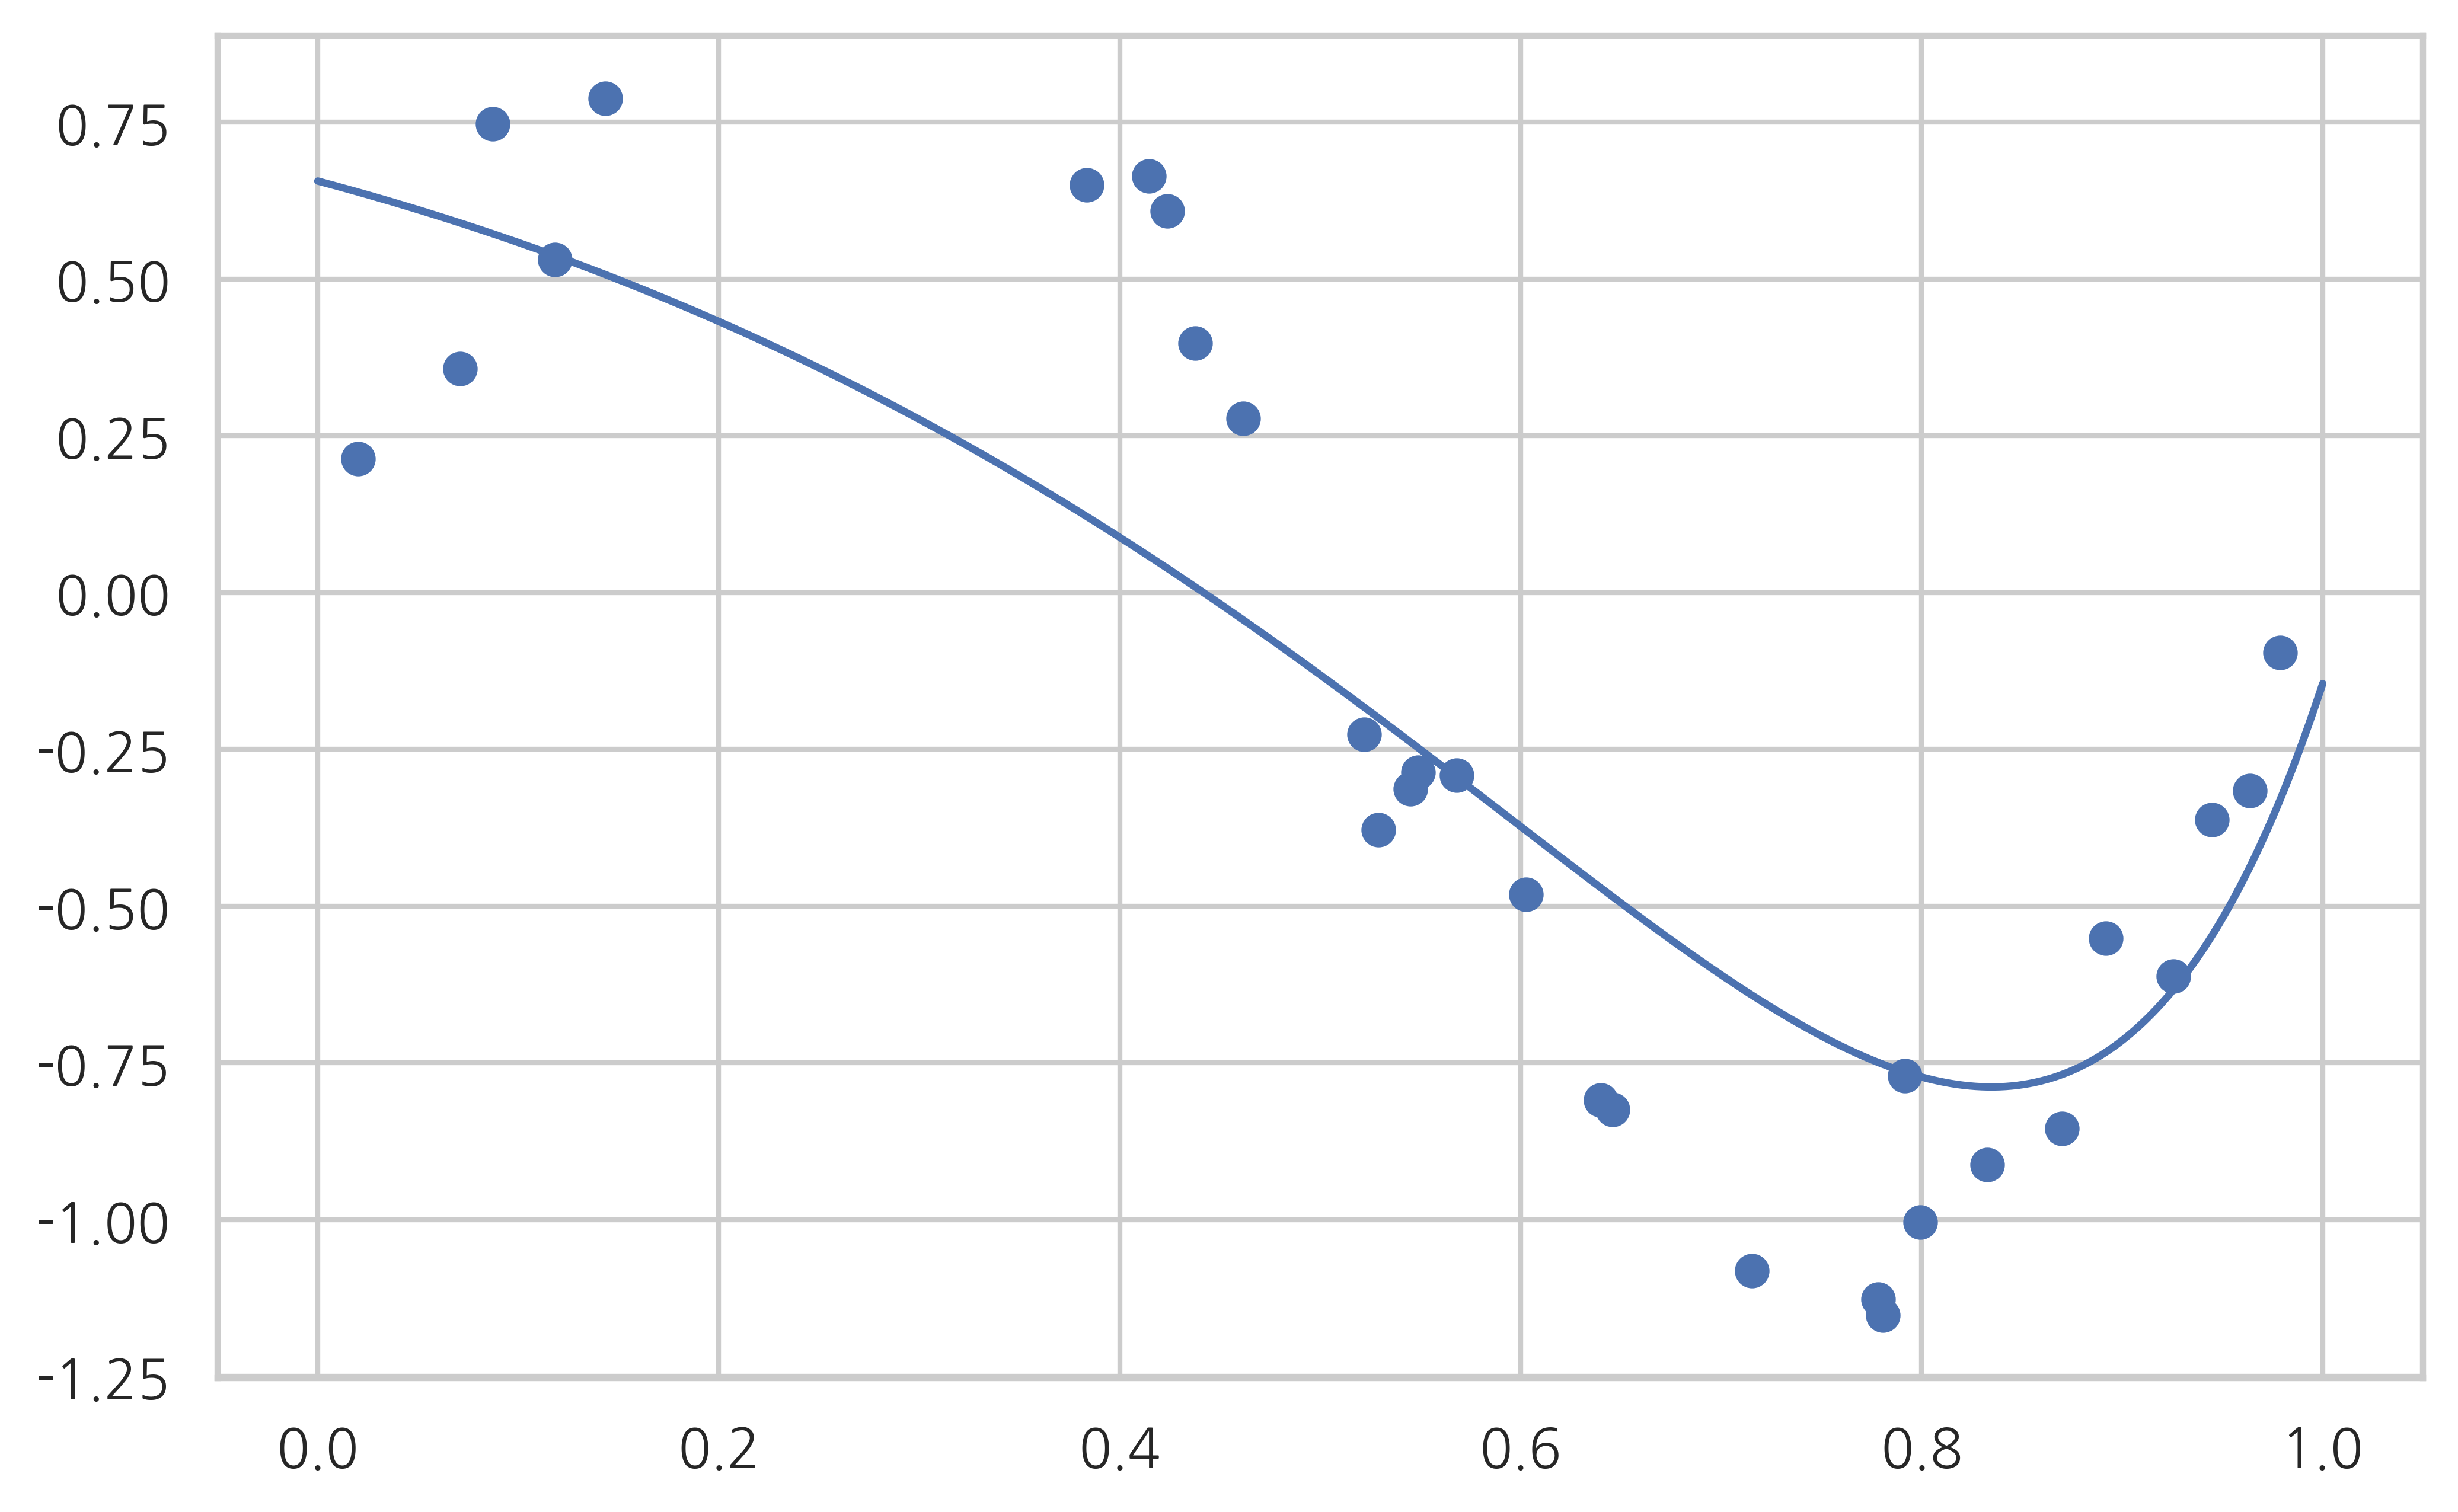

In [6]:
# Elastic Net 모형, 0 < L1_wt < 1
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4)

#### Scikit-Learn 정규화 회귀모형

In [7]:
def plot_sklearn(model):
    plt.scatter(x, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


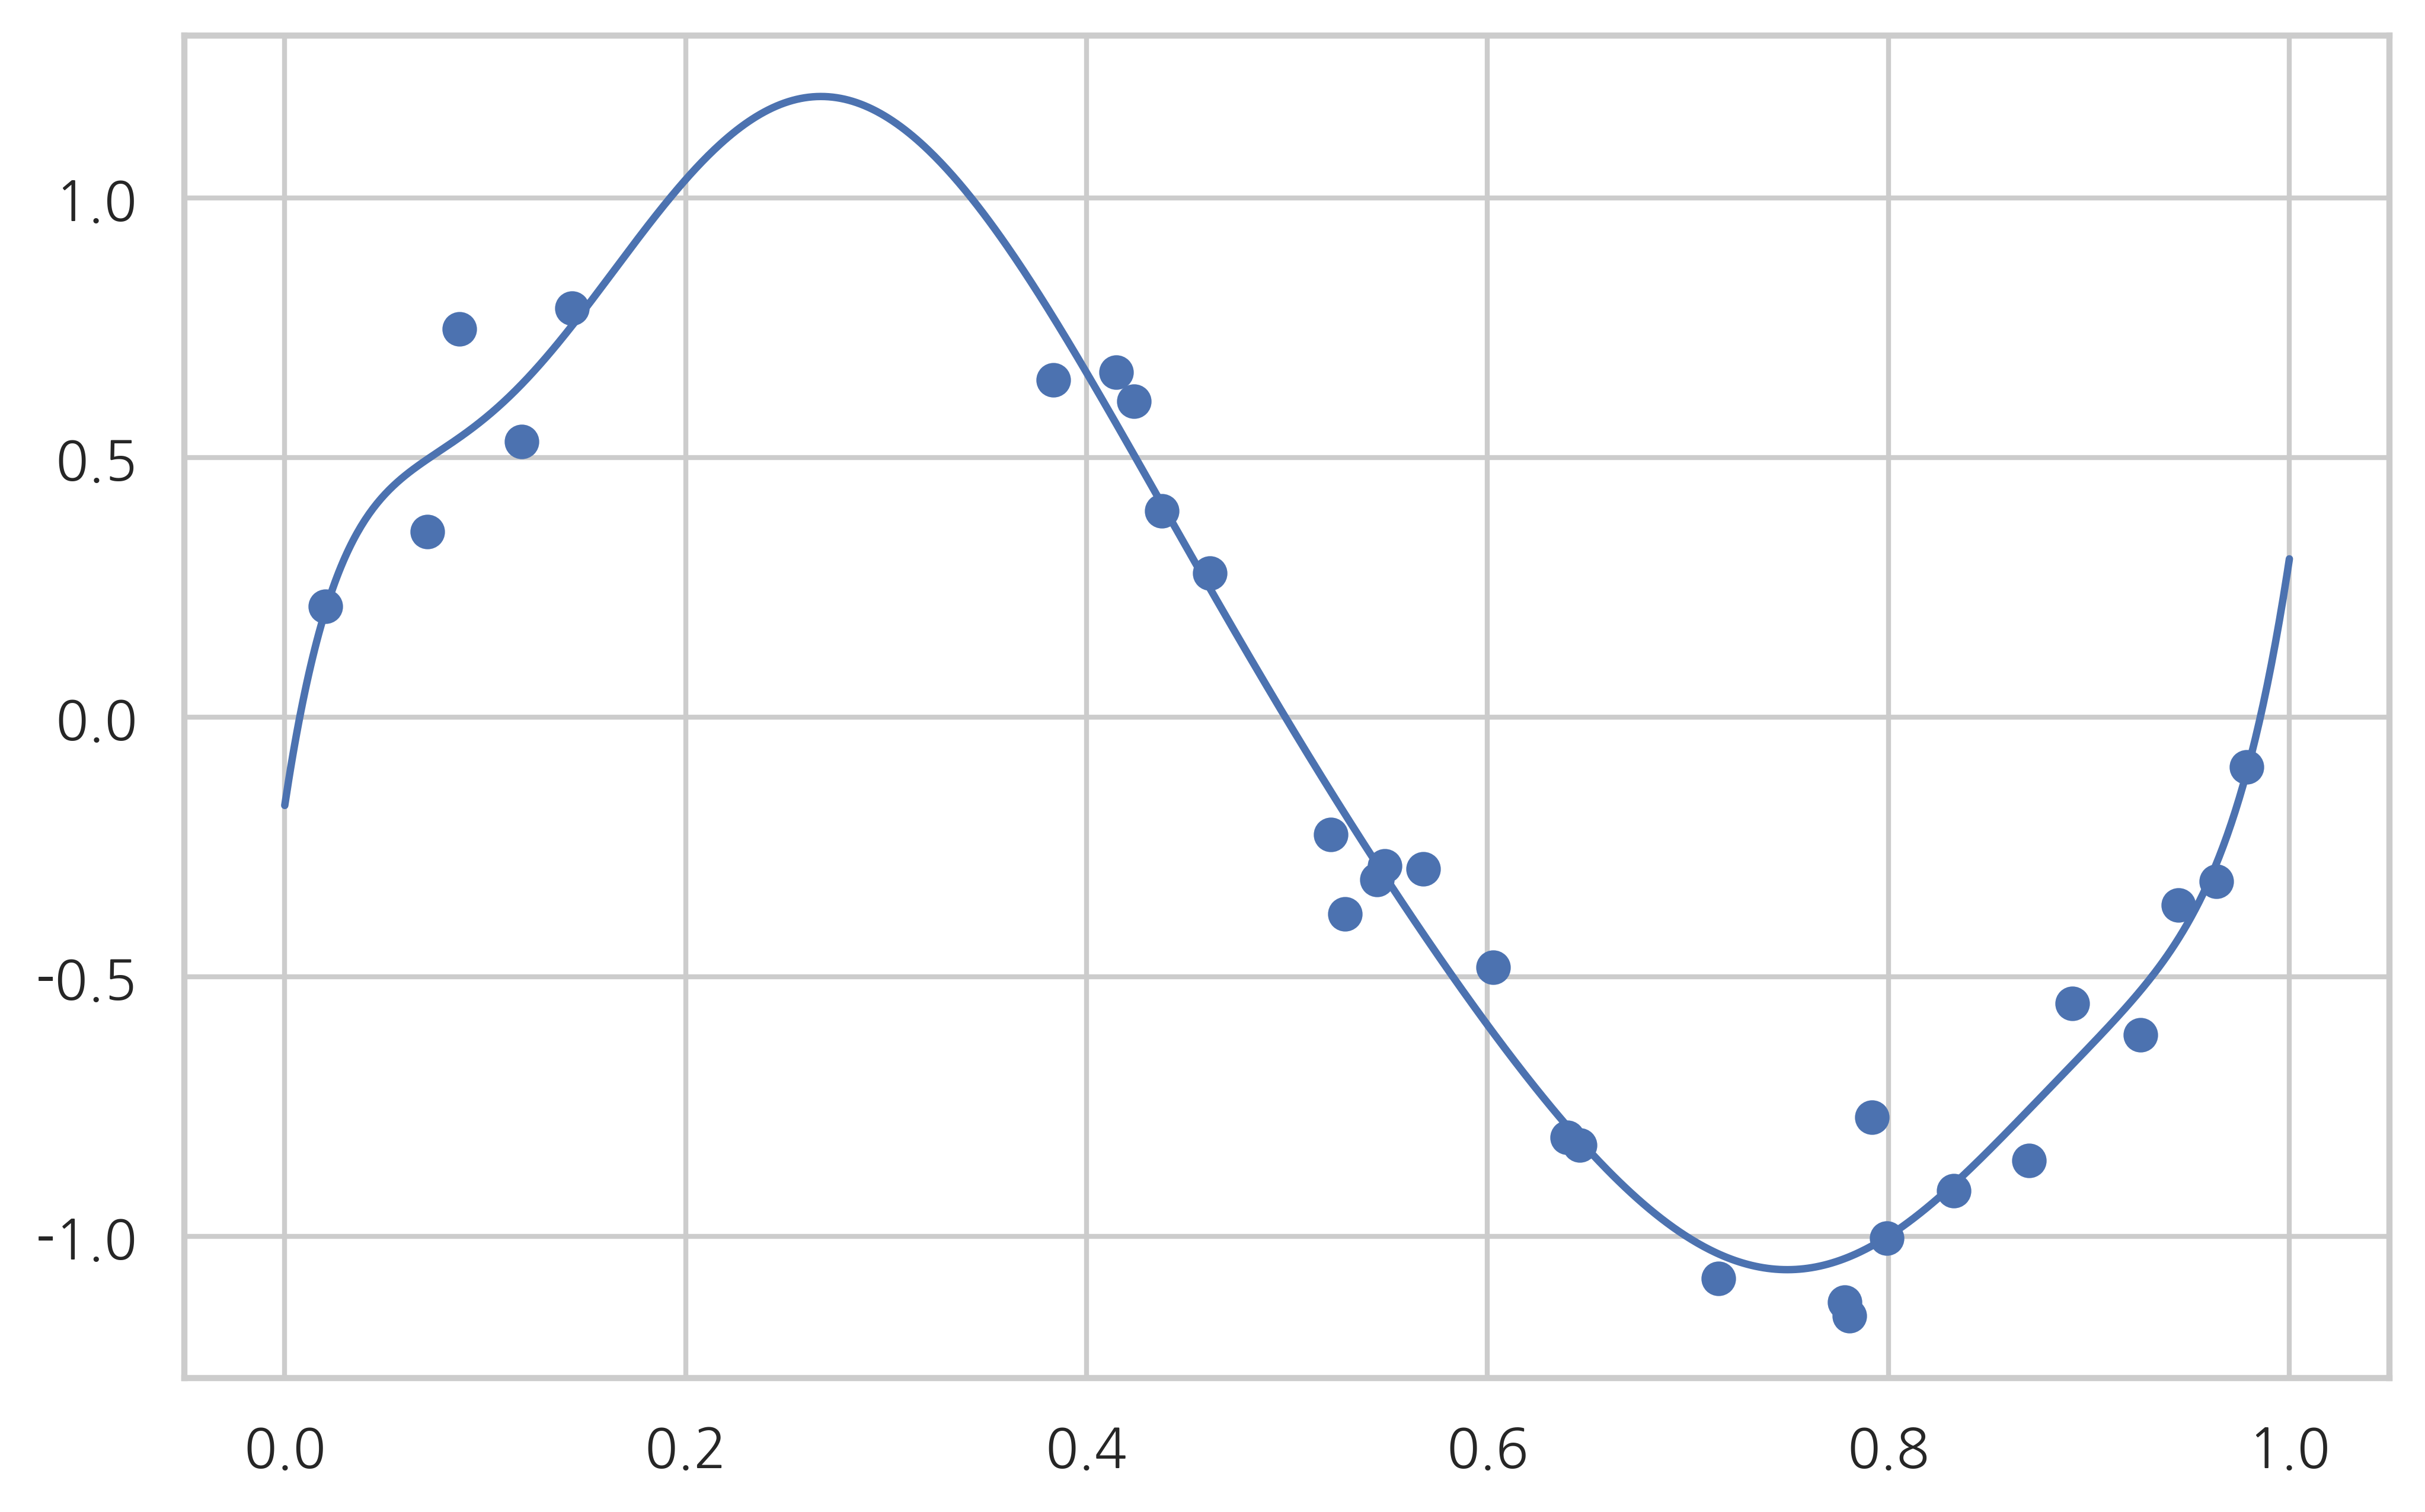

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(x, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


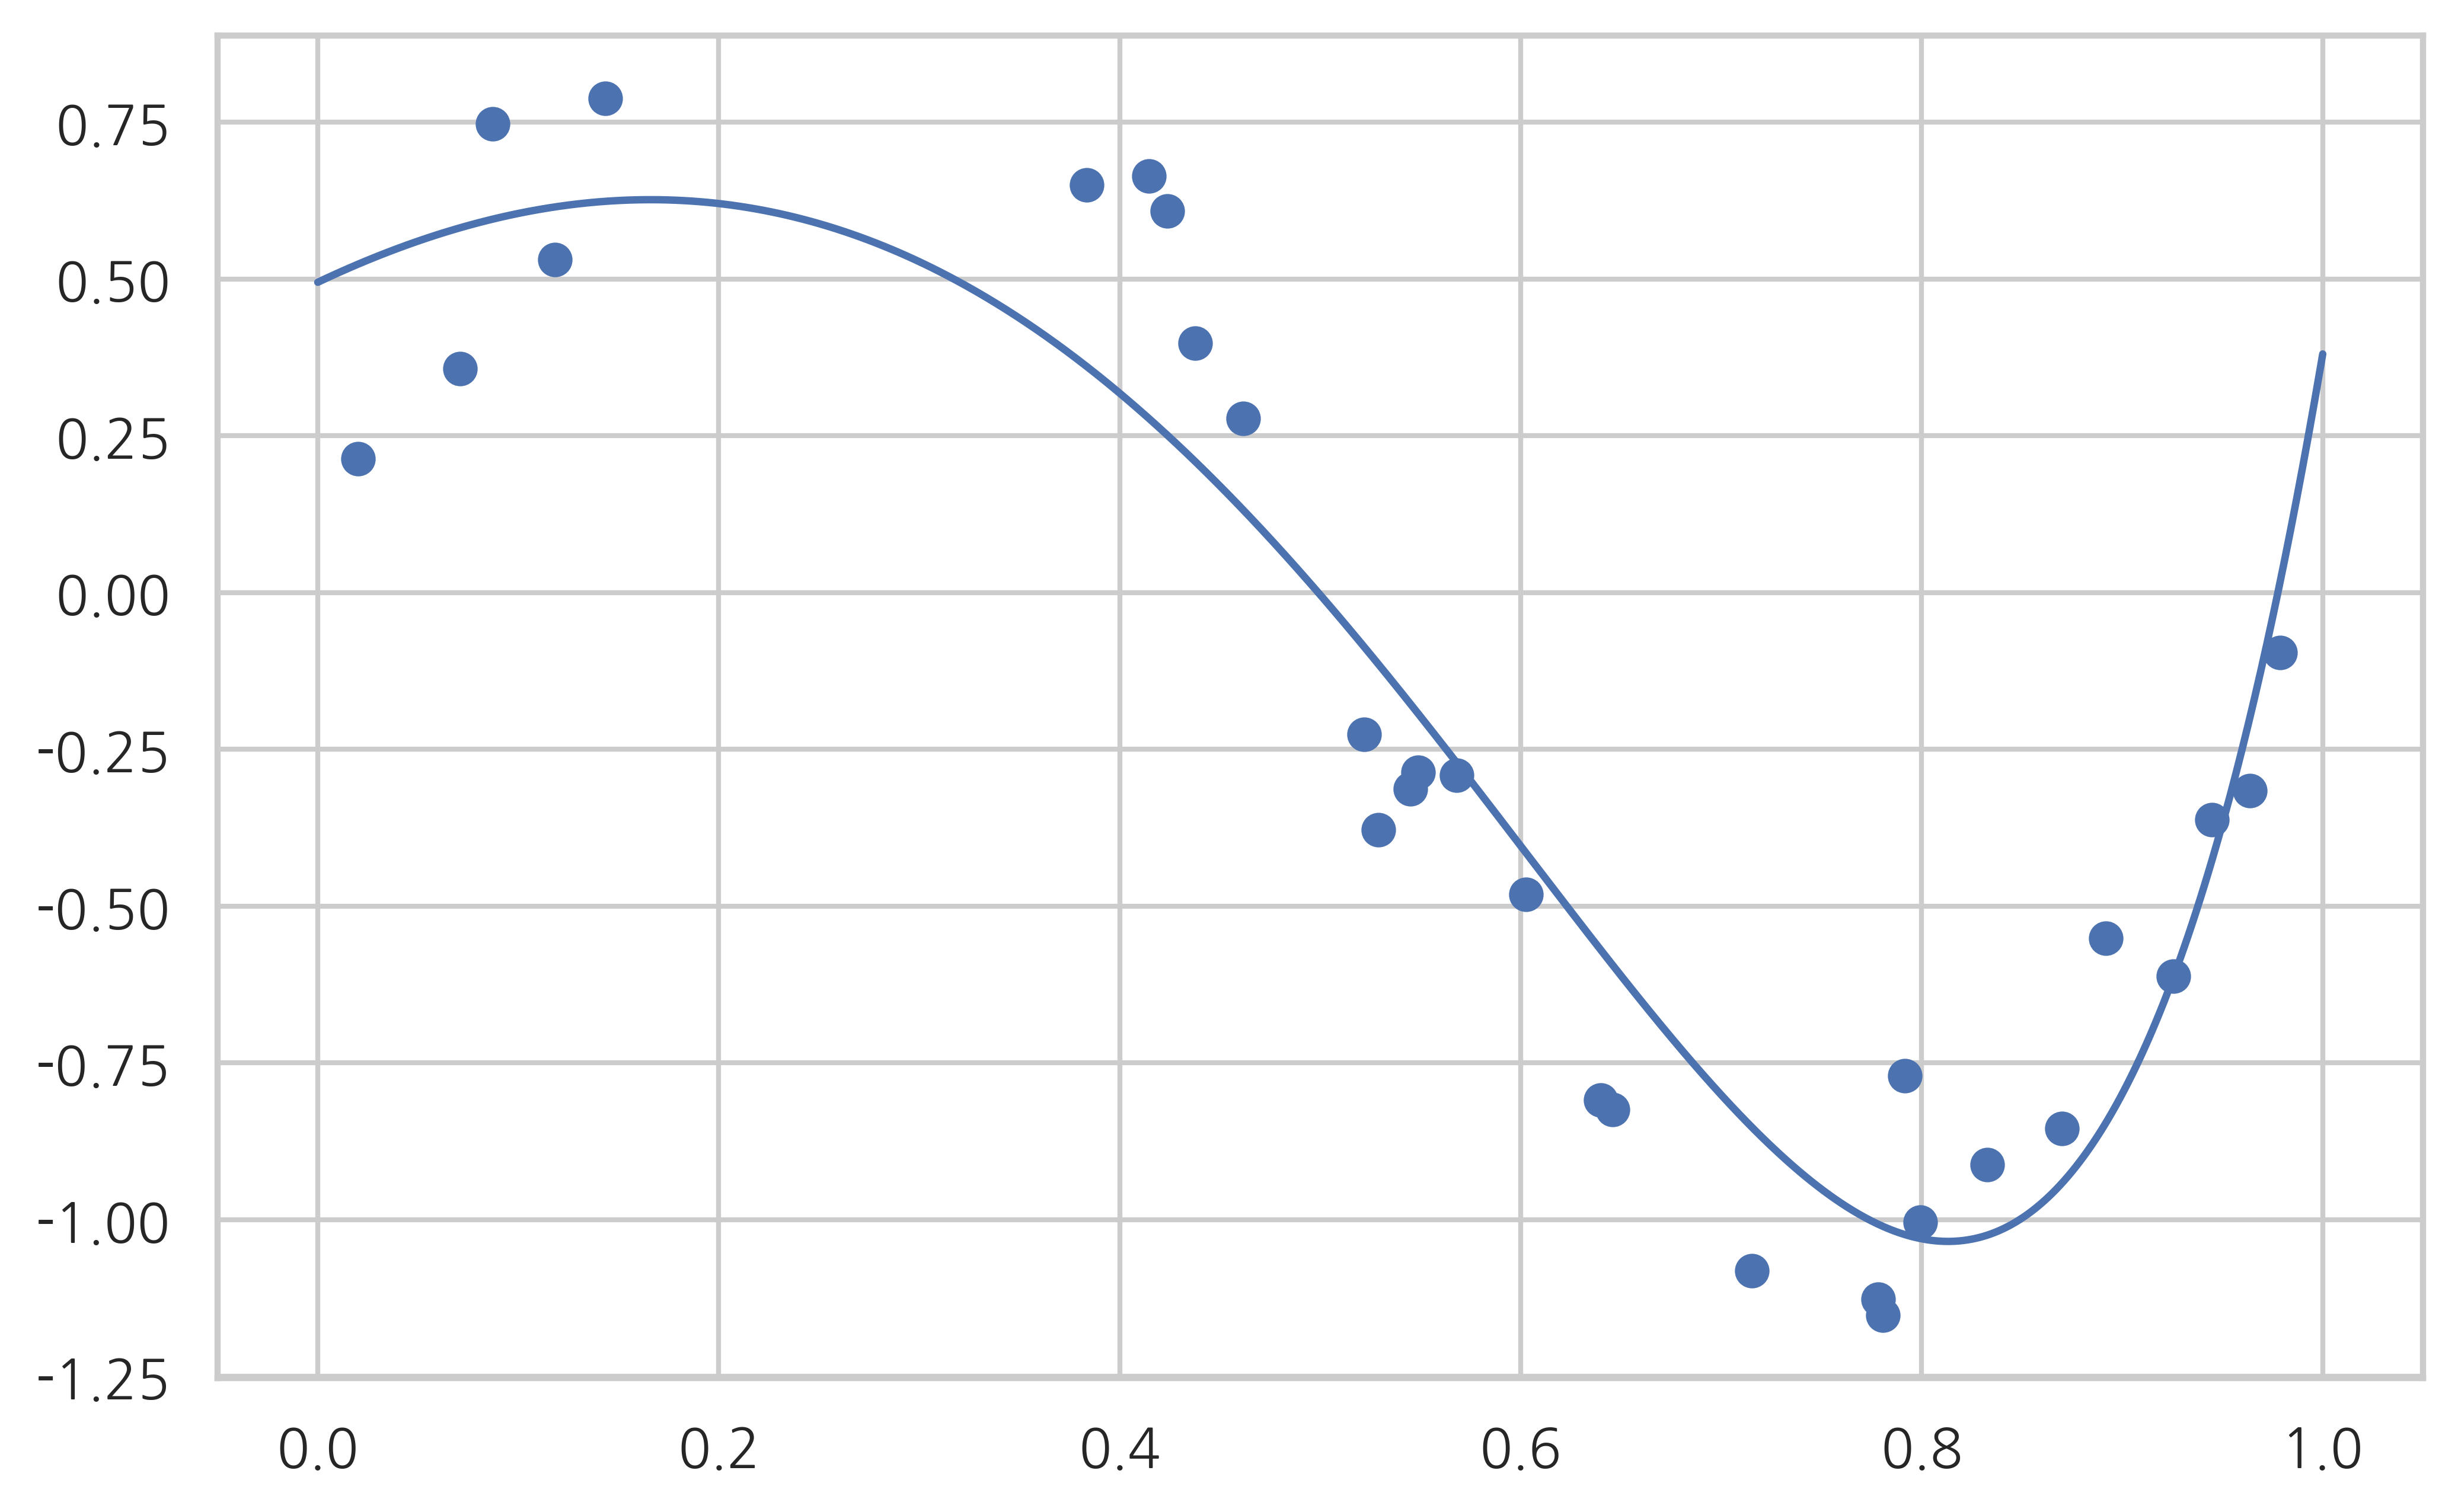

In [12]:
# Ridge
modelr = make_pipeline(poly, Ridge(alpha=0.01)).fit(x, y)
print(modelr.steps[1][1].coef_)
plot_sklearn(modelr)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


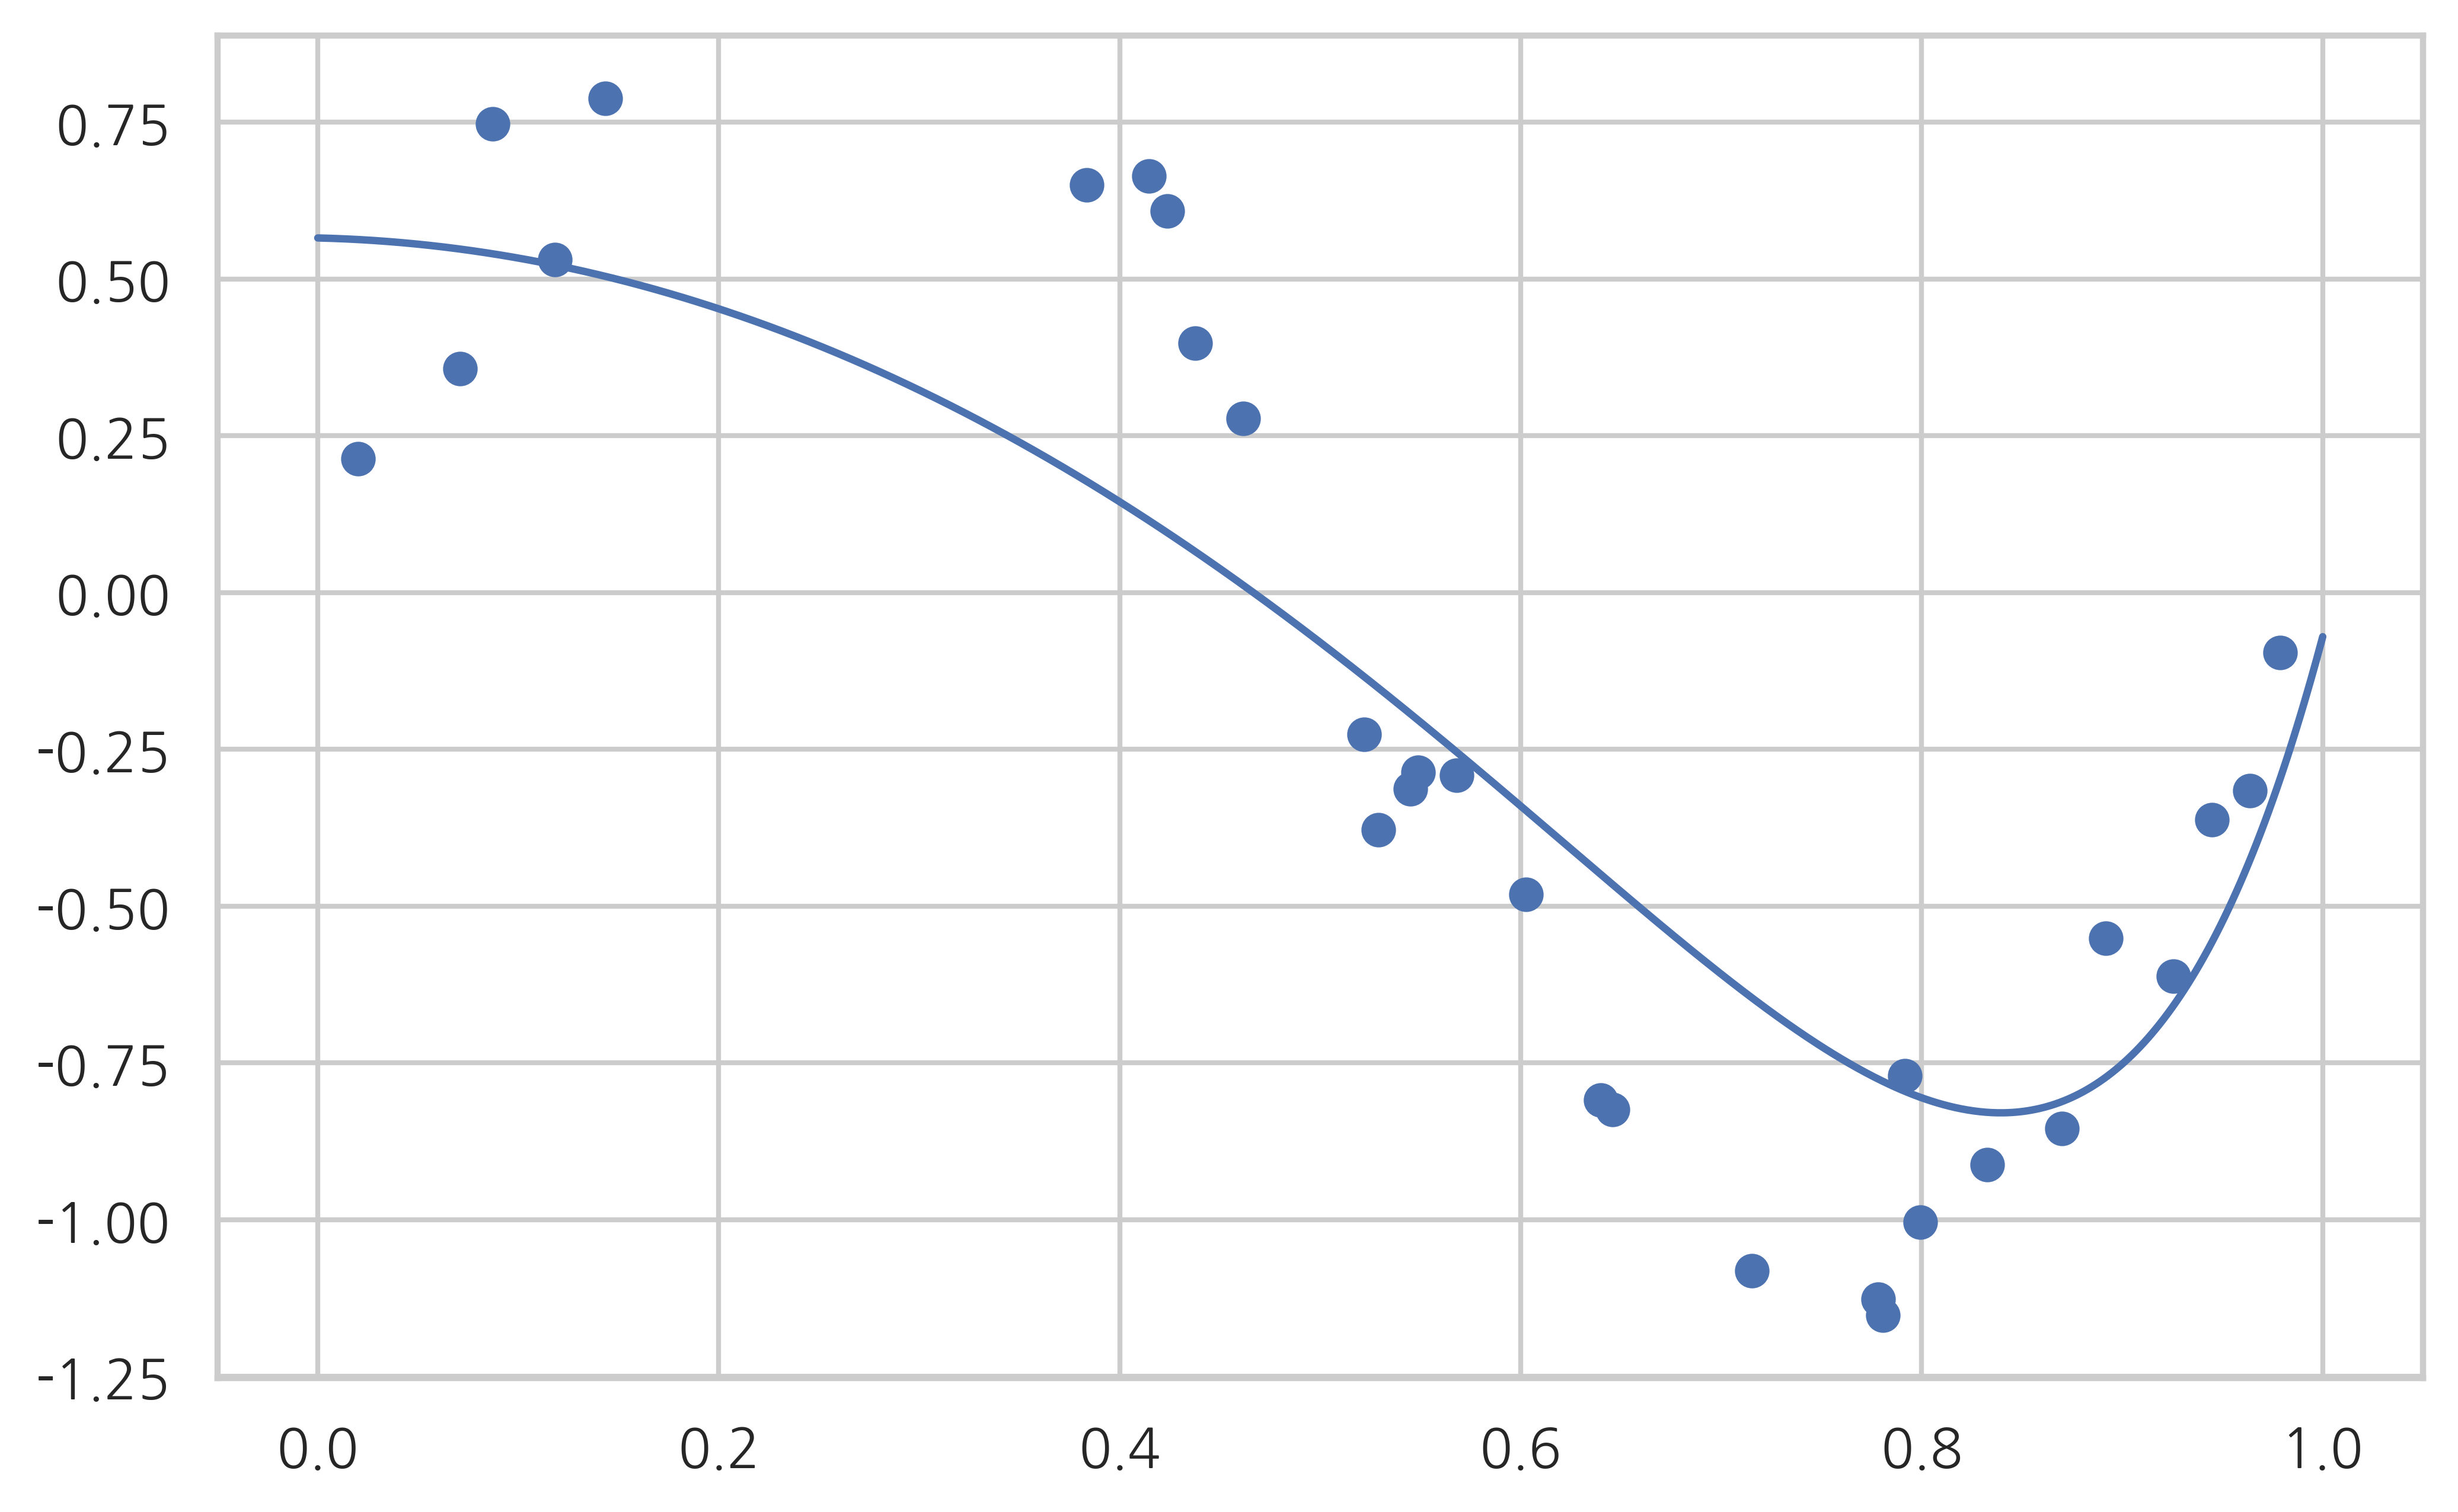

In [13]:
# Lasso
modell = make_pipeline(poly, Lasso(alpha=0.01)).fit(x, y)
print(modell.steps[1][1].coef_)
plot_sklearn(modell)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


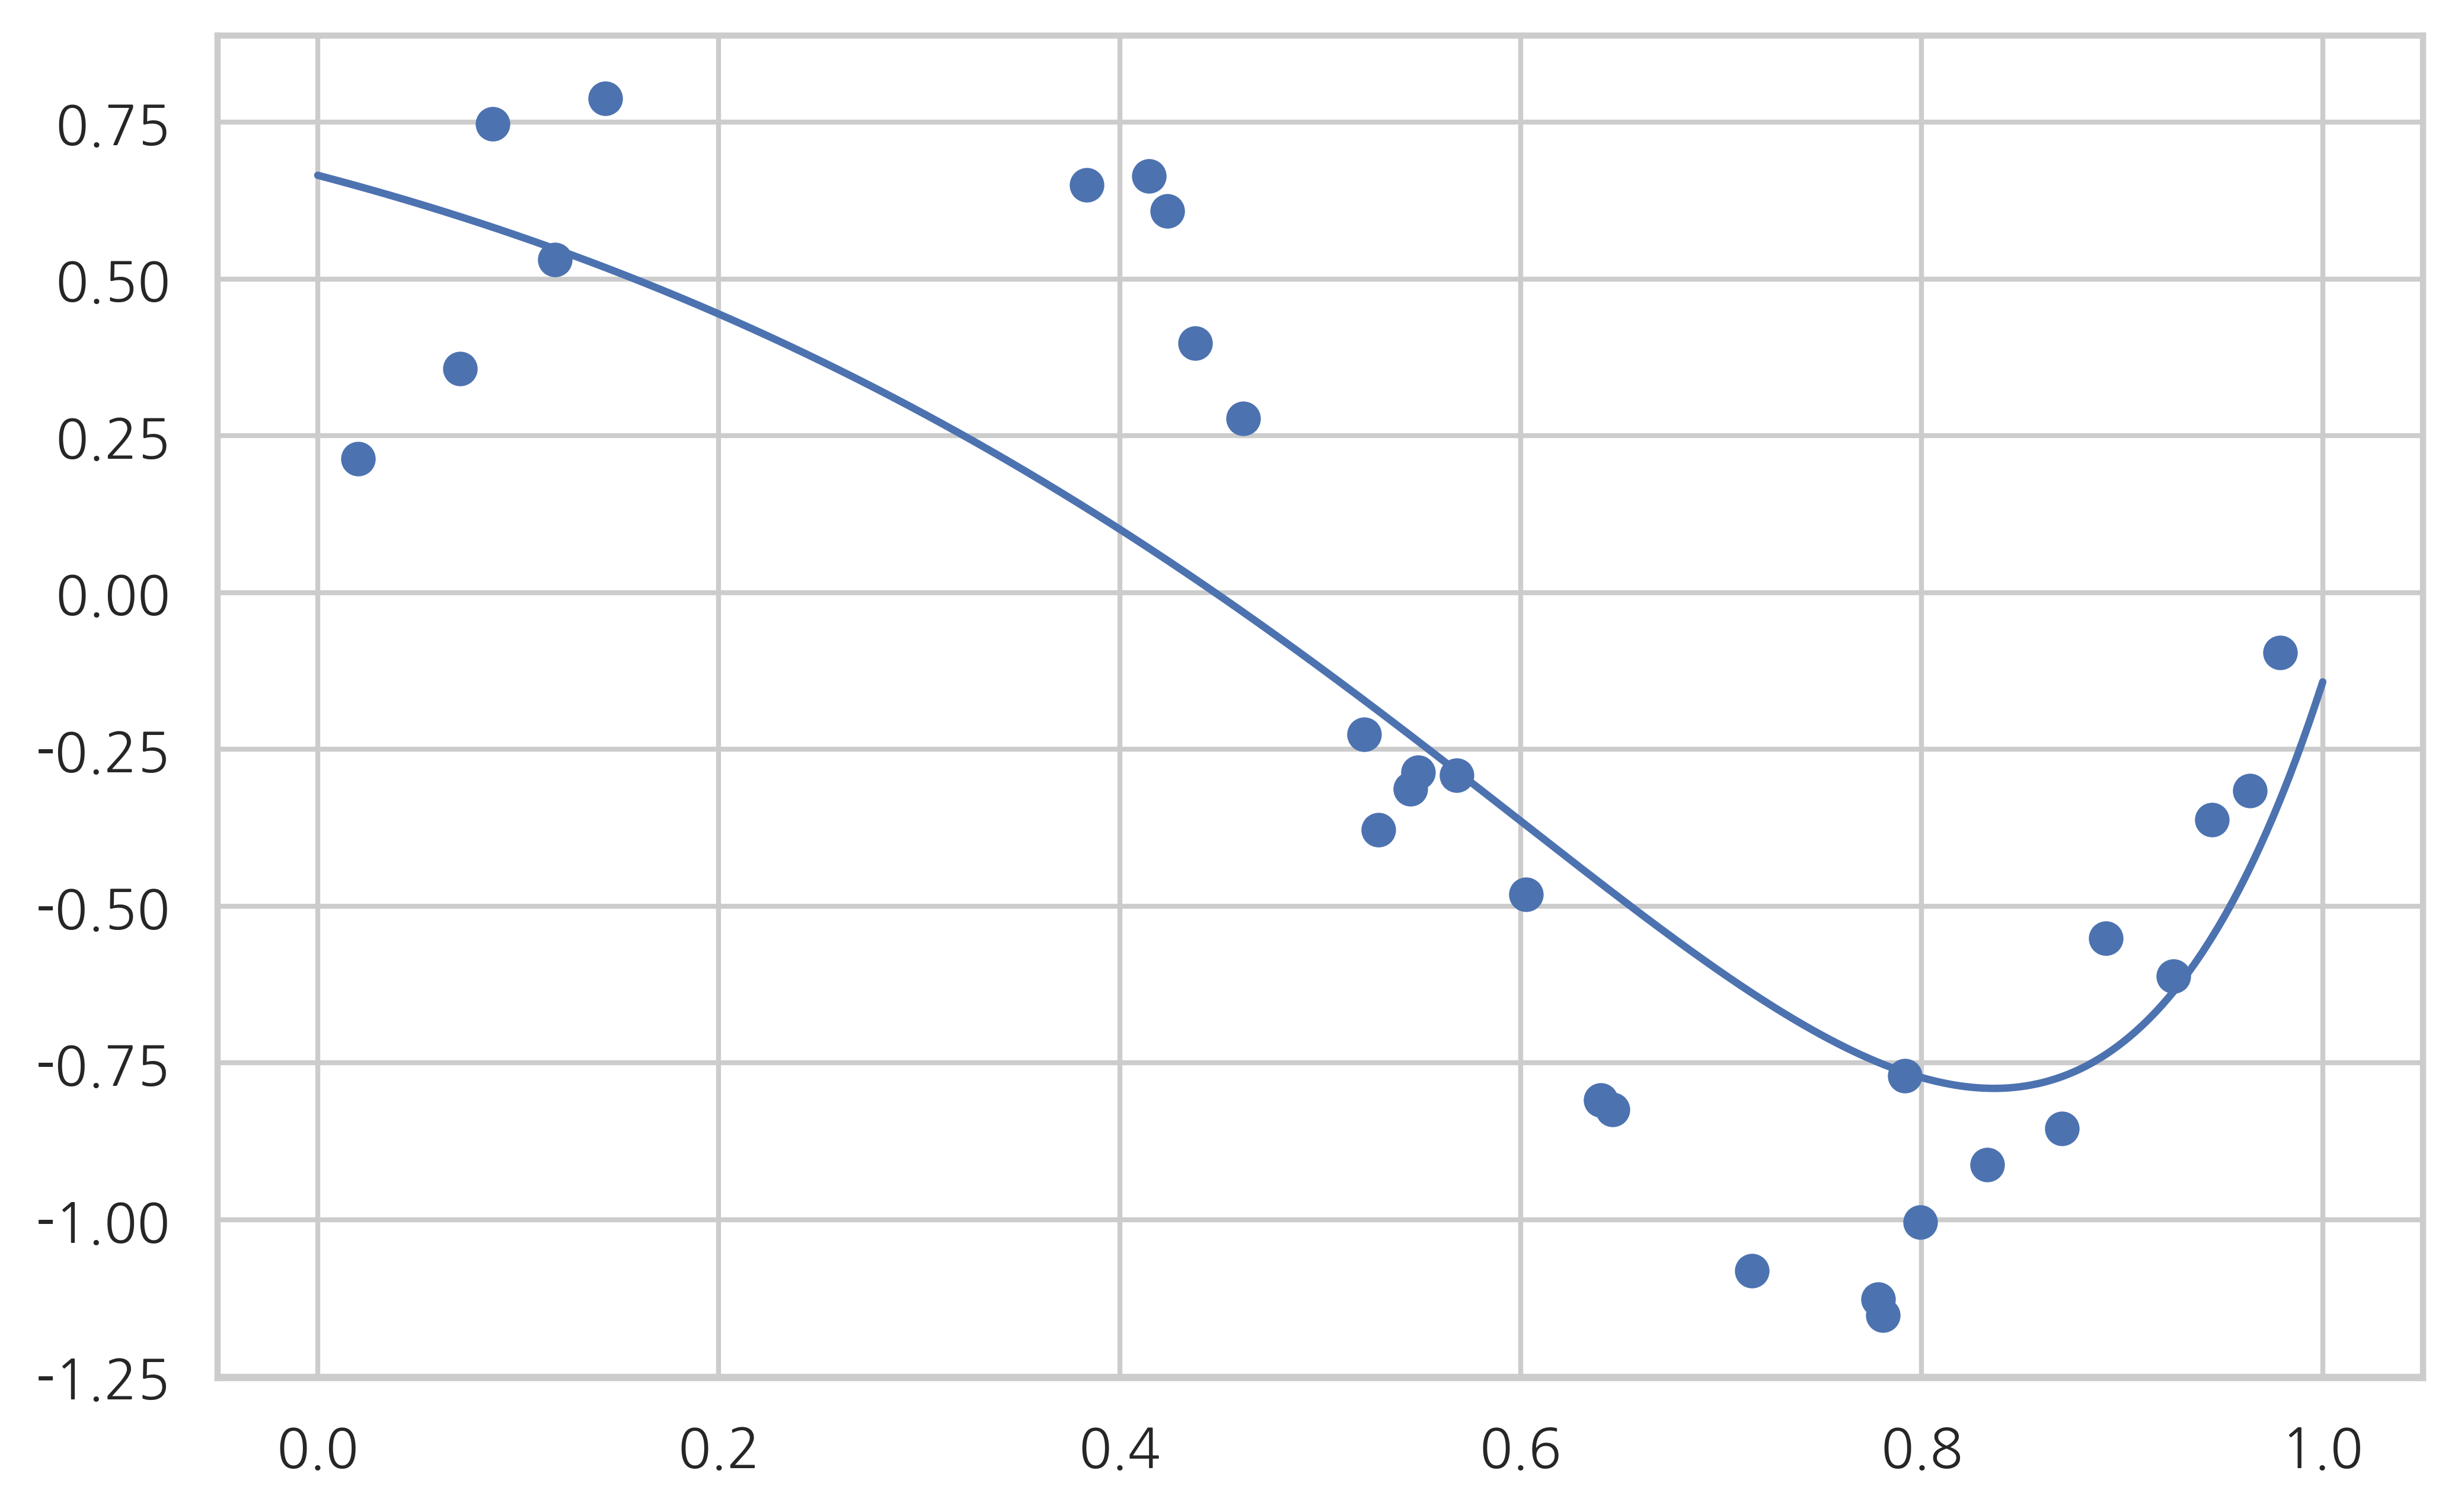

In [14]:
# ElasticNet
modele = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=.5)).fit(x, y)
print(modele.steps[1][1].coef_)
plot_sklearn(modele)

In [ ]:
# Ridge와 Lasso의 차이점

In [15]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

In [20]:
# Ridge
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(x, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [22]:
# Lasso
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(x, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


Text(0.5, 1.0, 'Lasso')

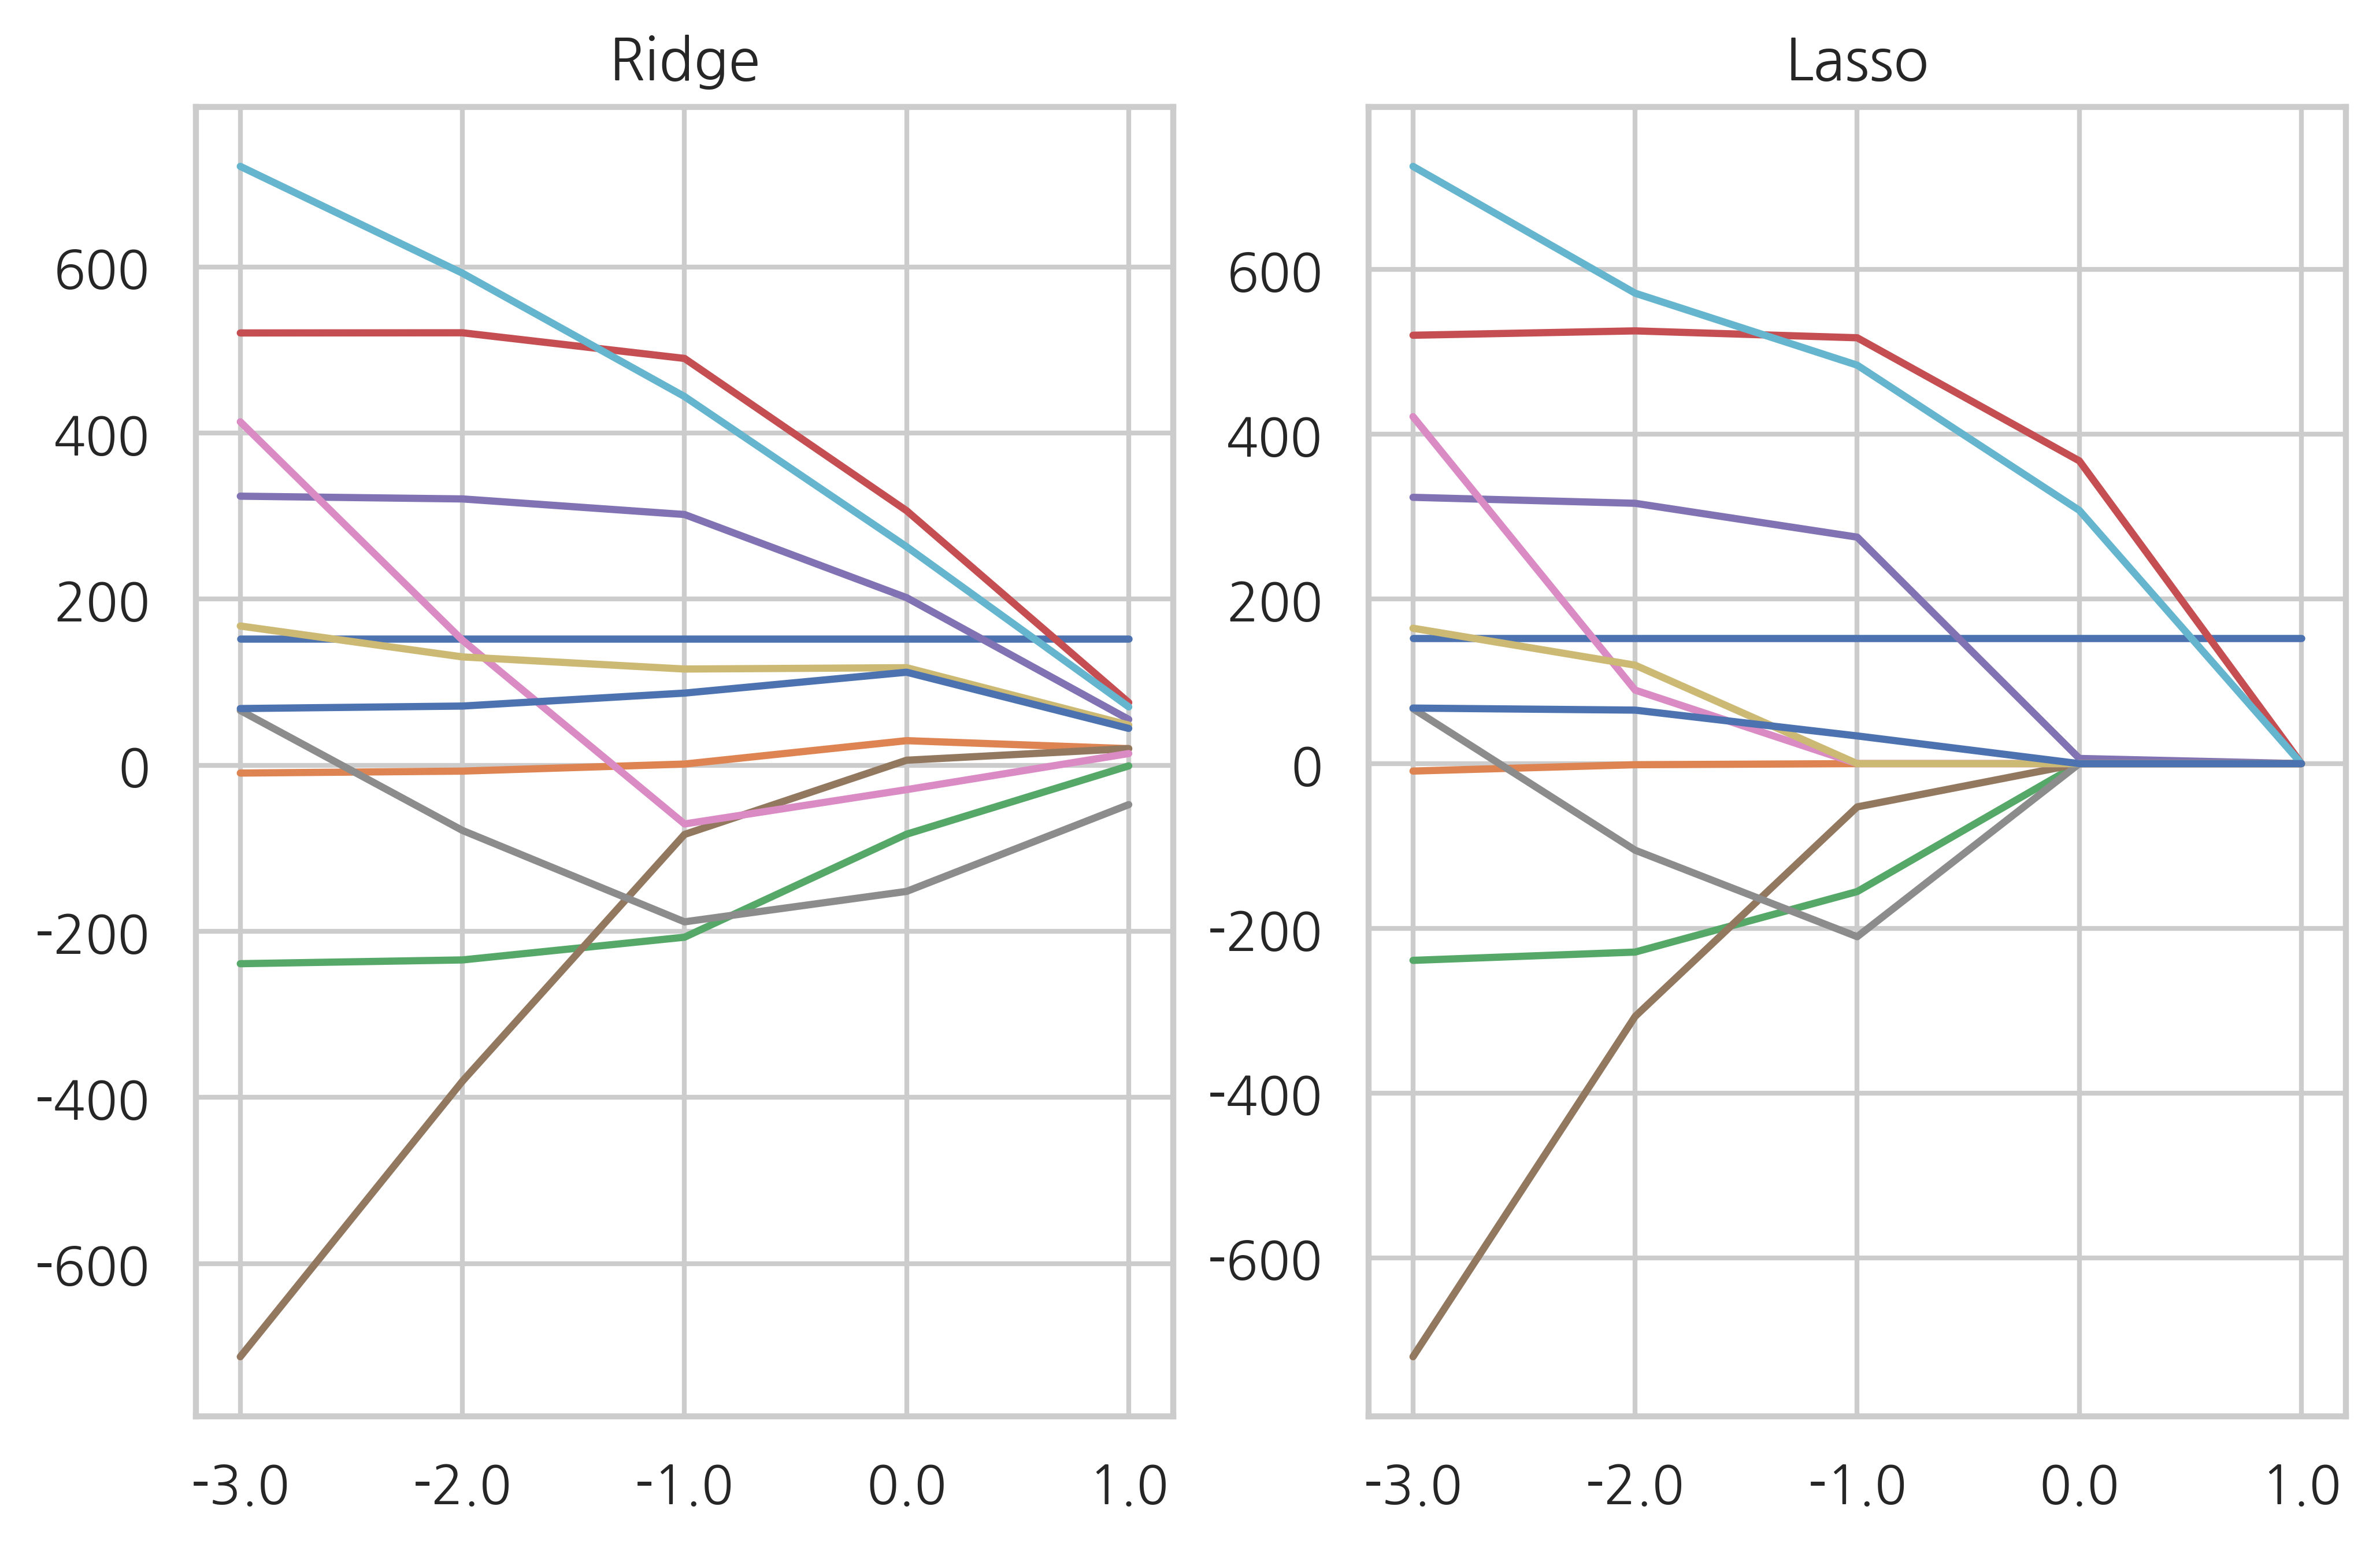

In [23]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title('Lasso')

#### 최적 정규화

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

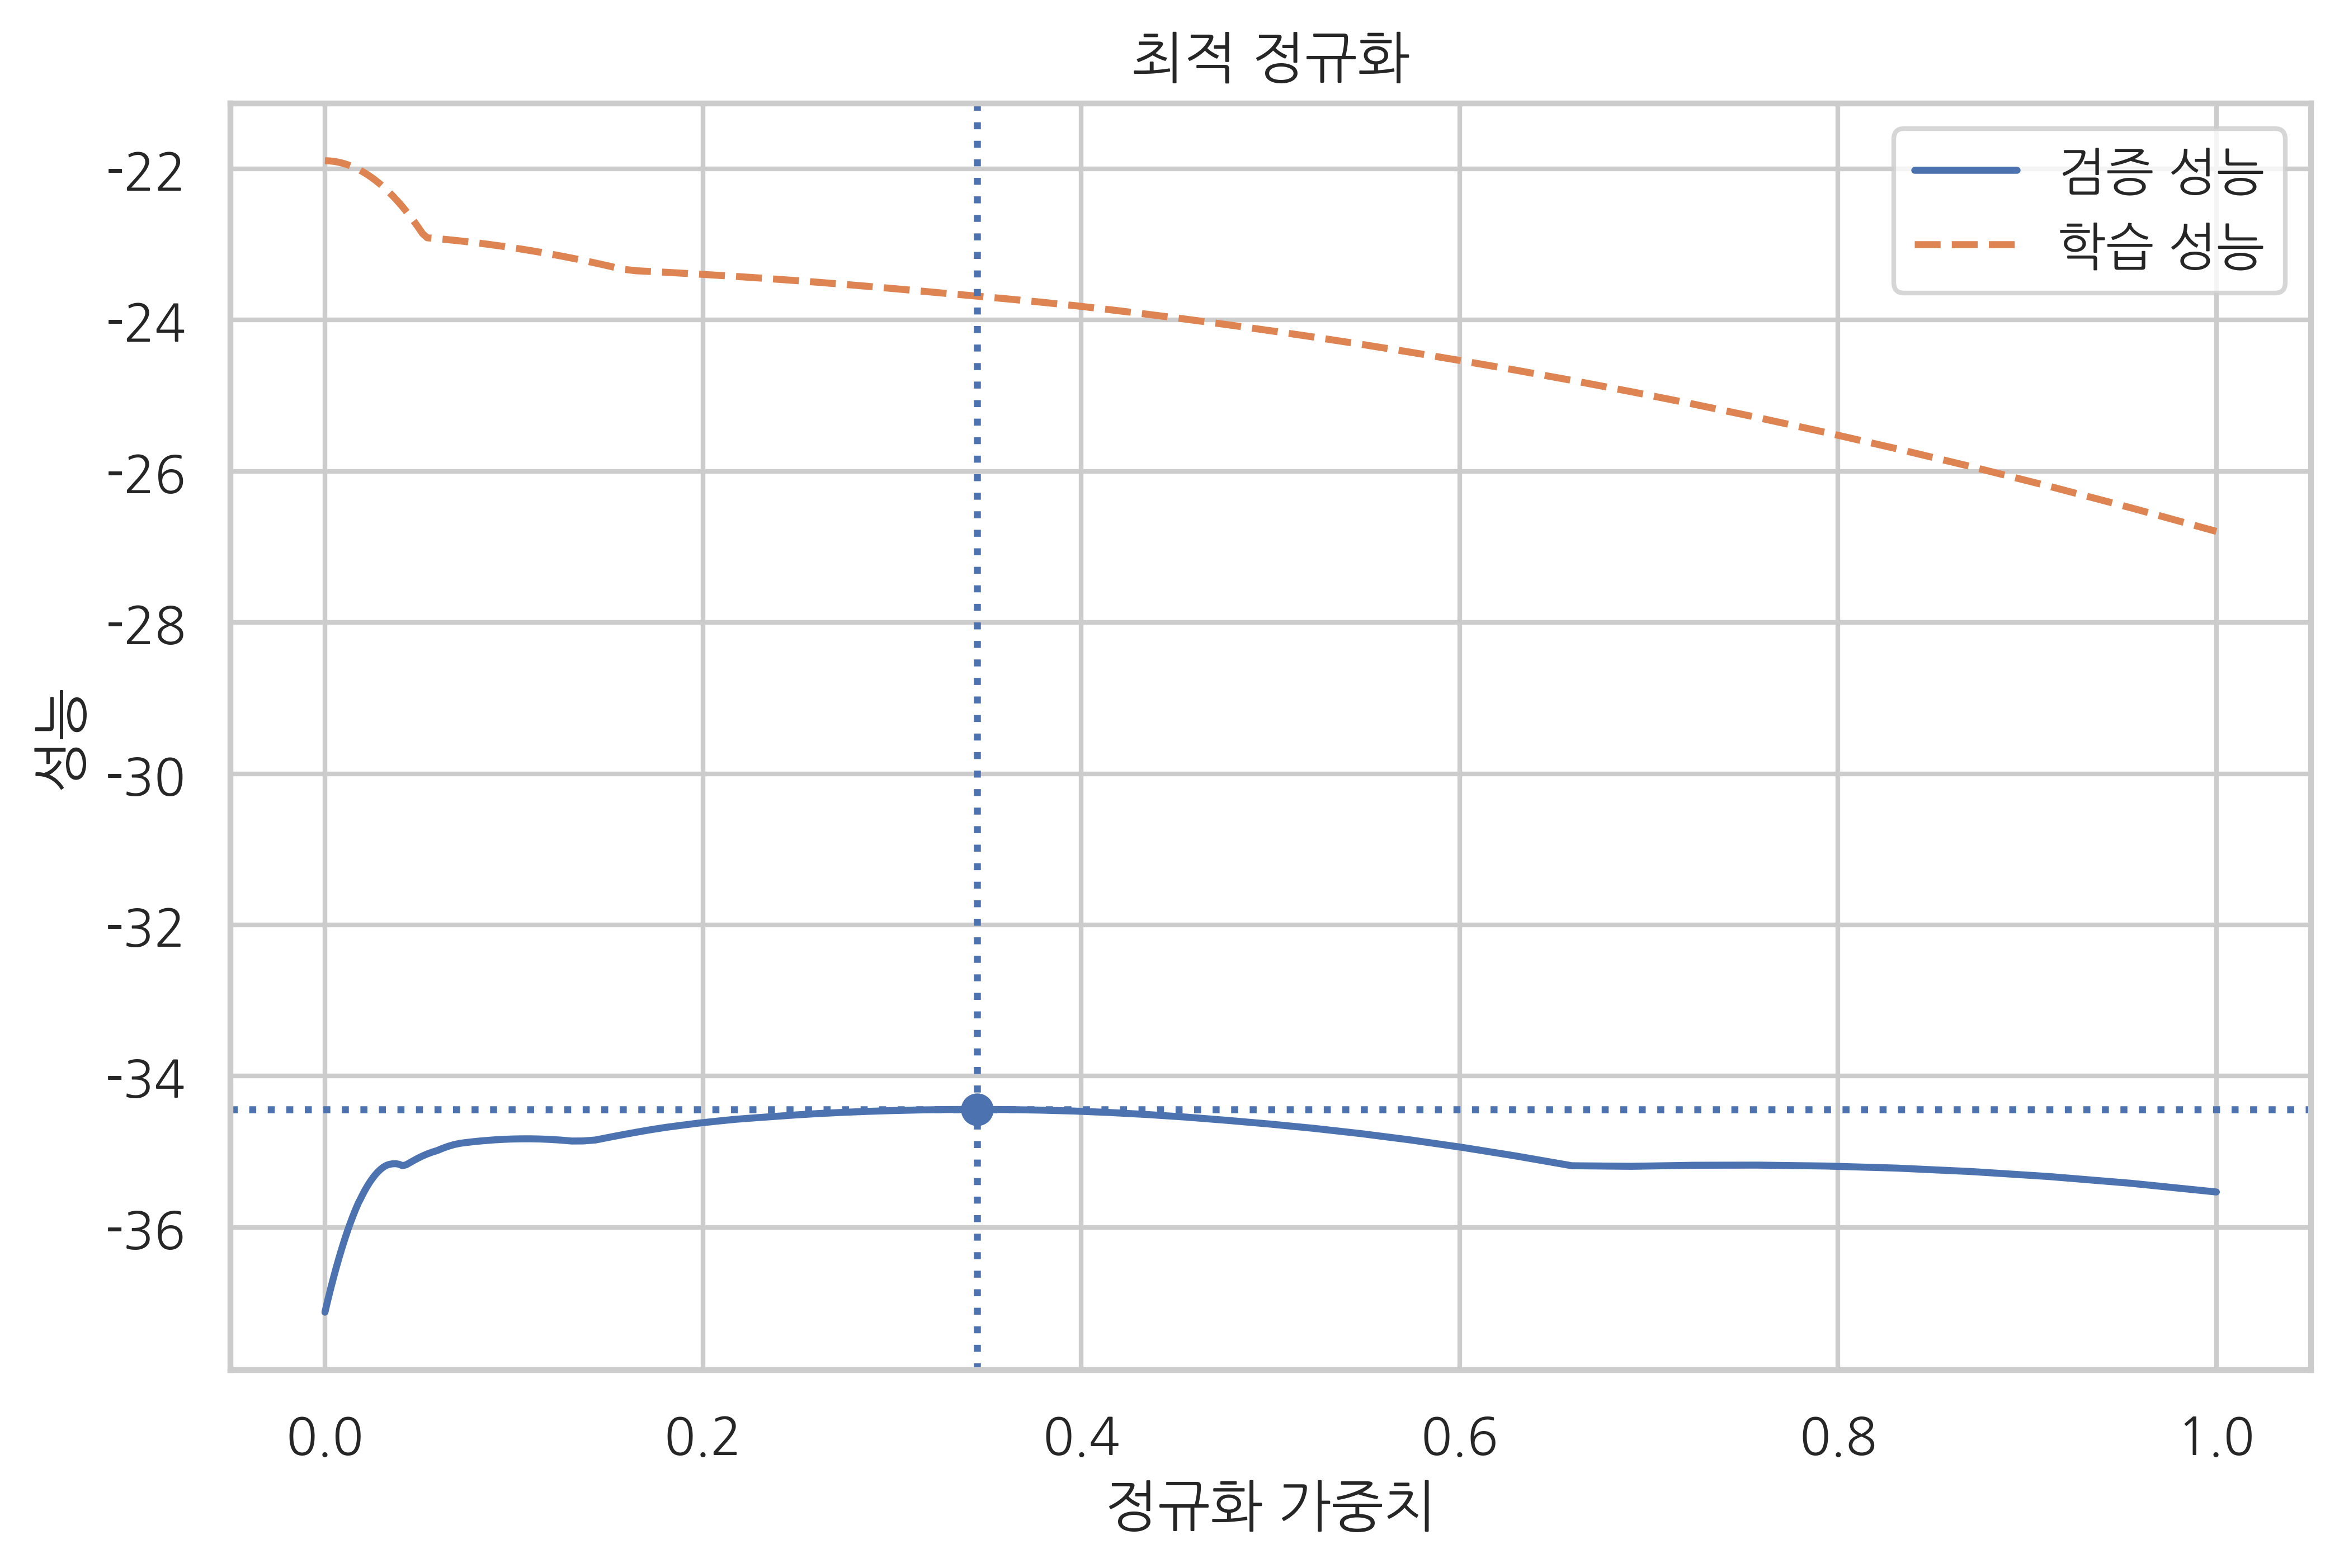

In [26]:
boston = load_boston()
x = boston.data
y = boston.target

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = - mean_squared_error(y, model.fit(x, y).predict(x))
    test_score = np.mean(cross_val_score(
        model, x, y, scoring='neg_mean_squared_error', cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, '-', label='검증 성능')
plt.plot(alphas, train_scores, '--', label='학습 성능')
plt.axvline(optimal_alpha, linestyle=':')
plt.axhline(optimal_score, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title('최적 정규화')
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

#### 검증성능 곡선

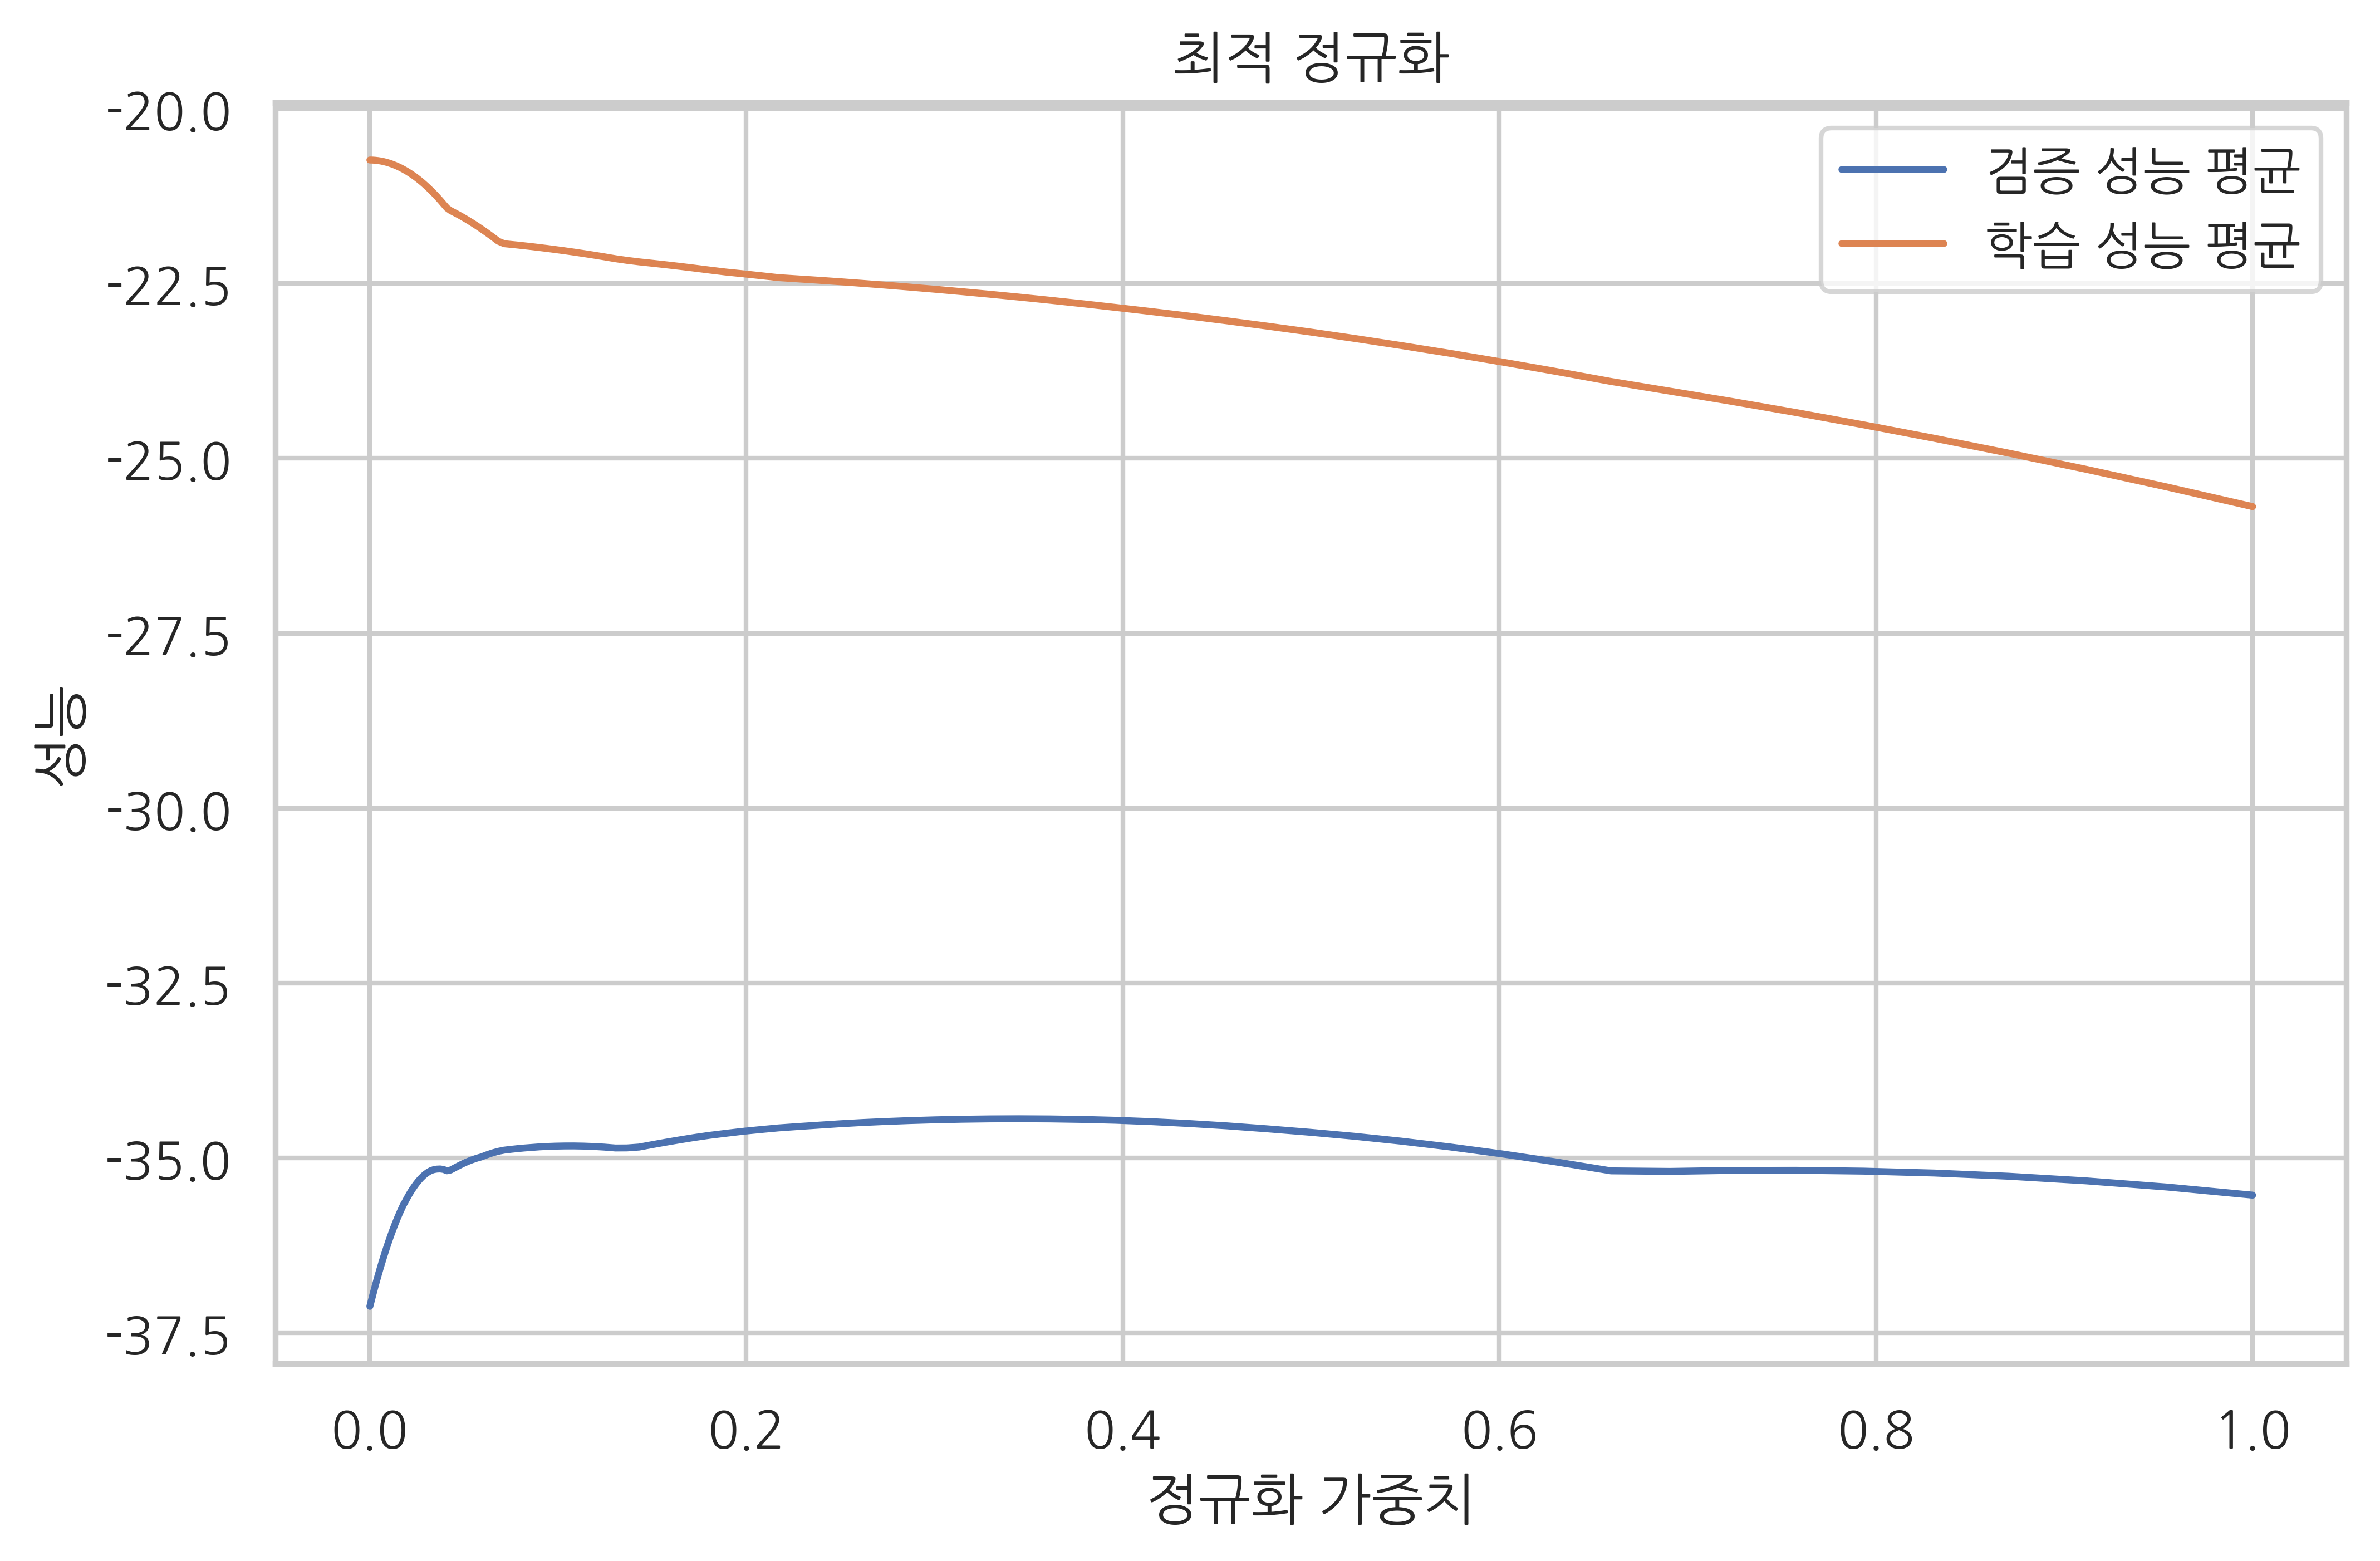

In [27]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    Lasso(), x, y, 'alpha', alphas, cv=5, scoring='neg_mean_squared_error')

plt.plot(alphas, test_scores.mean(axis=1), '-', label='검증 성능 평균')
plt.plot(alphas, train_scores.mean(axis=1), '-', label='학습 성능 평균')
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.title('최적 정규화')
plt.show()

#### 다항회귀 차수 결정

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [43]:
n_samples = 100
np.random.seed(0)
x = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * x) + np.random.randn(n_samples) * 0.5
x = x[:, np.newaxis]

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lreg', LinearRegression())])
degrees = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    model, x, y, 'poly__degree', degrees, cv=100, scoring='neg_mean_squared_error')

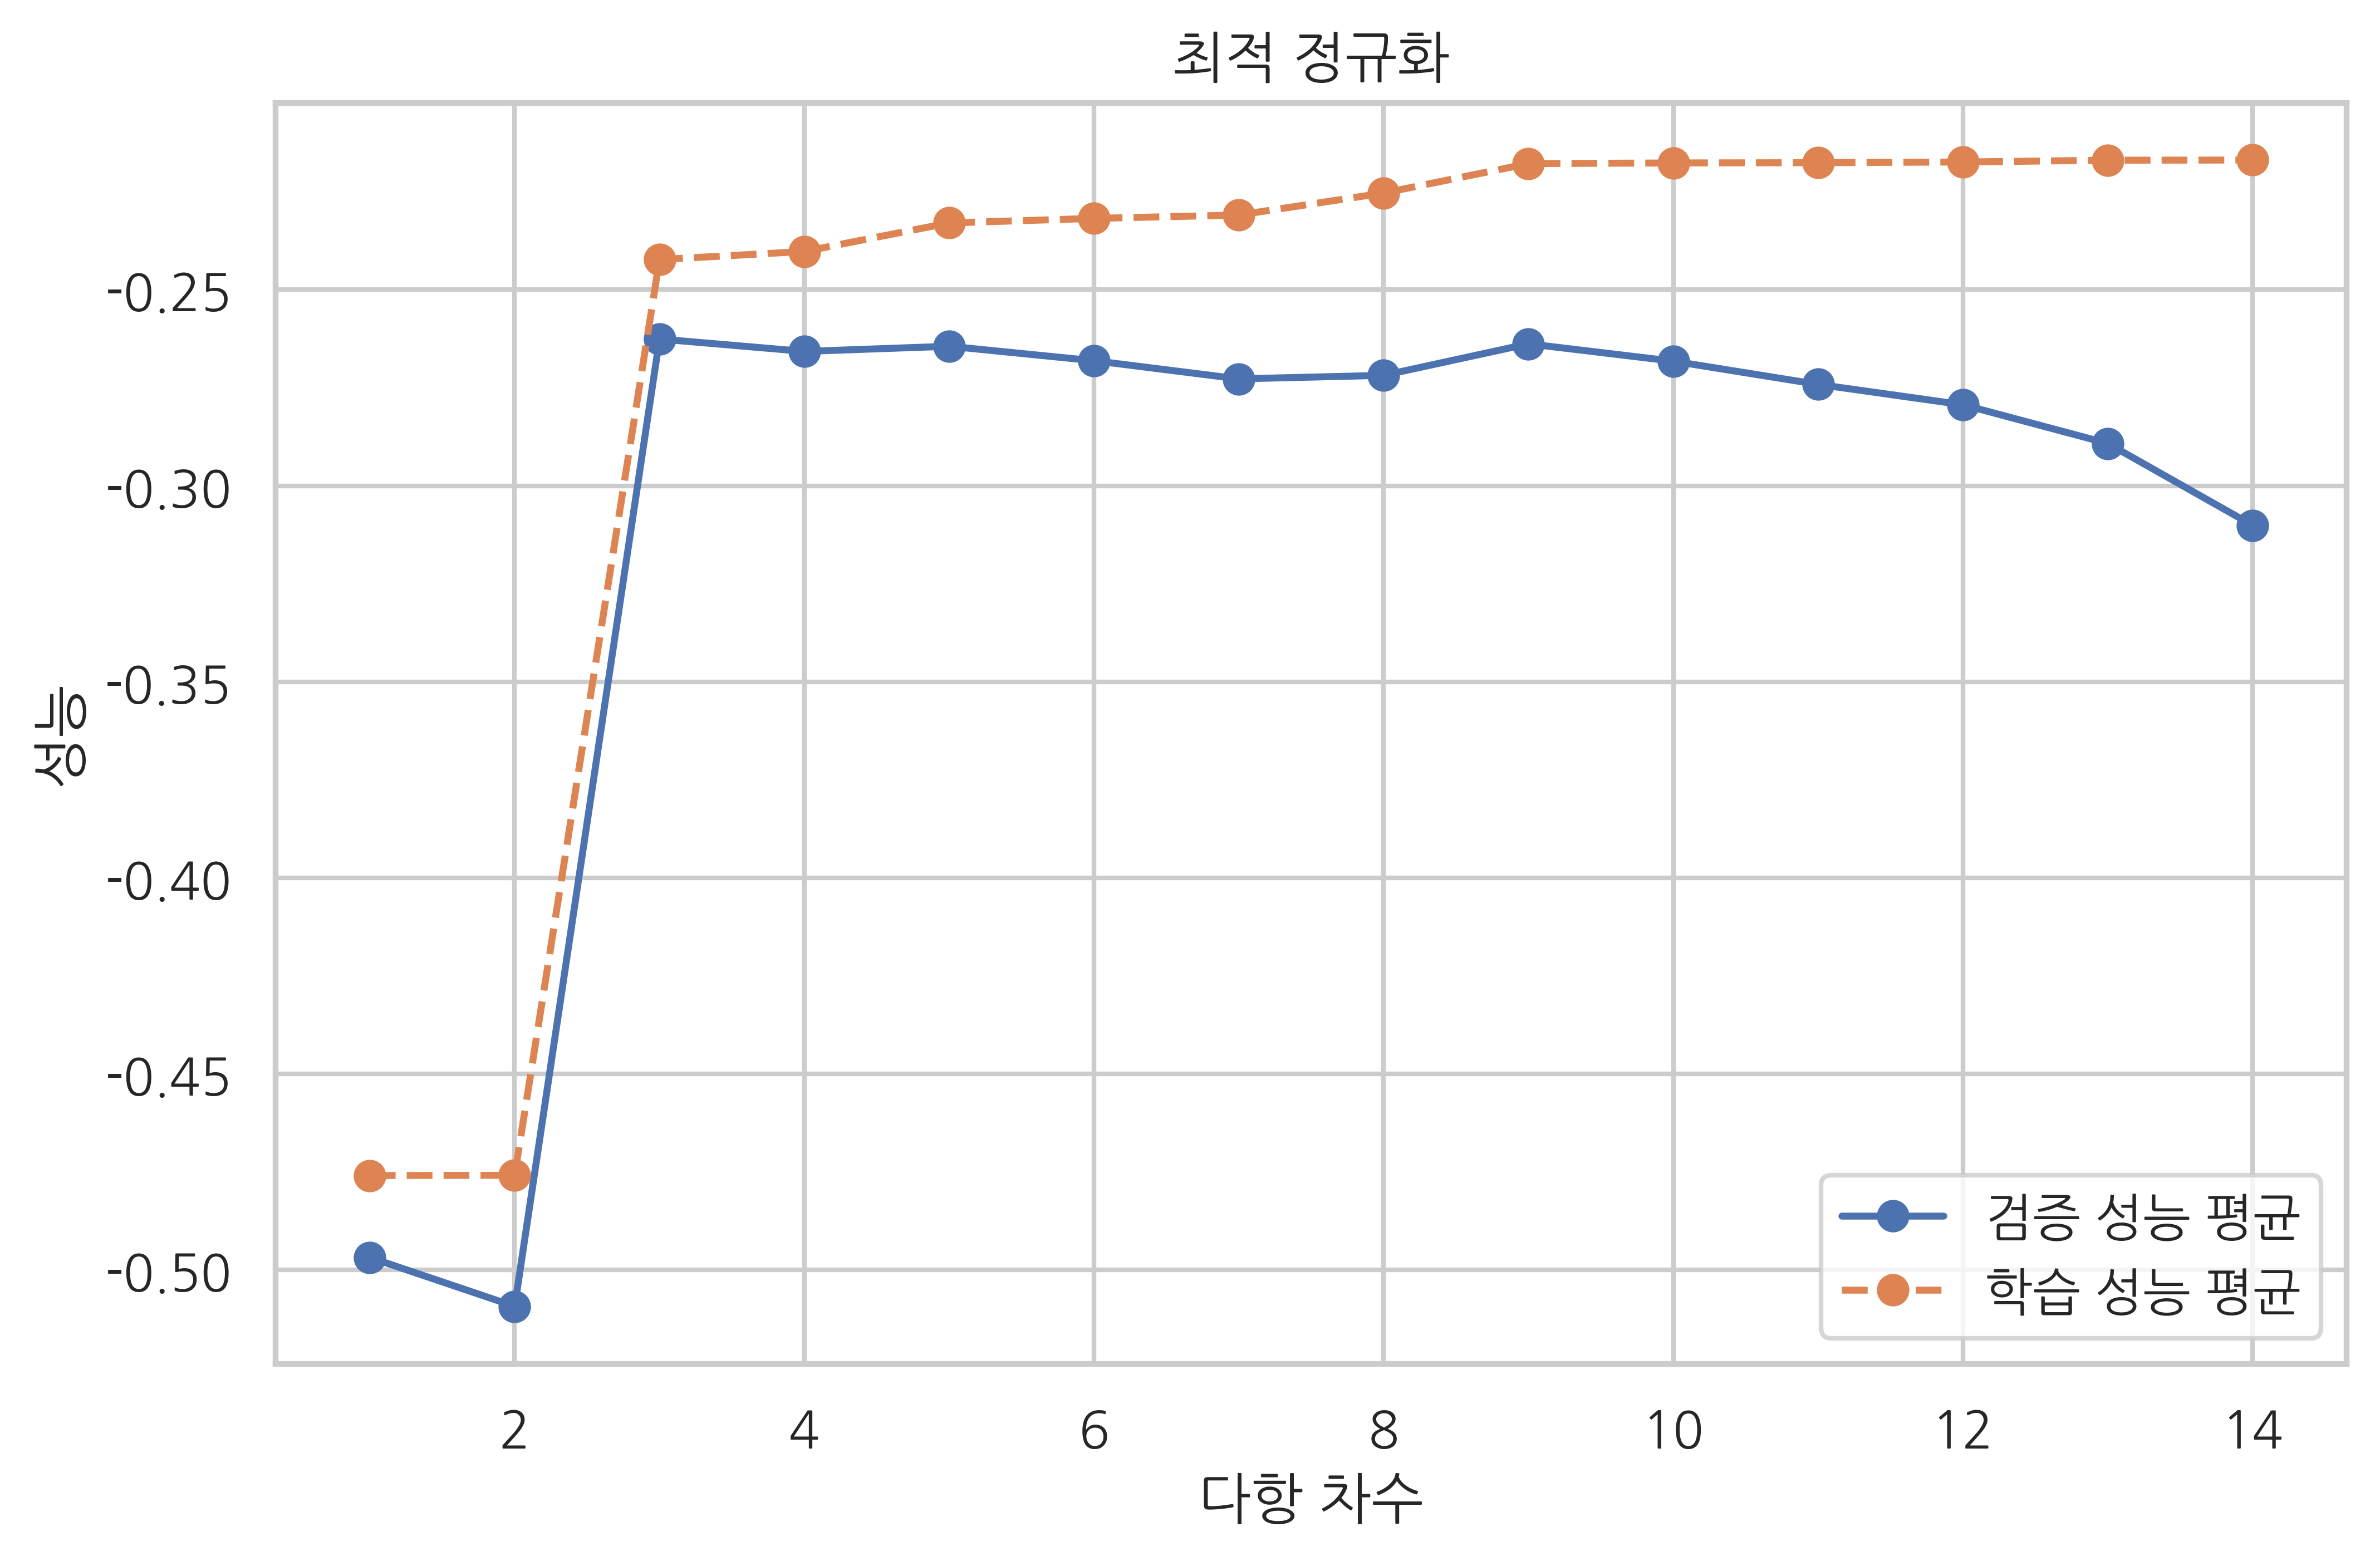

In [44]:
plt.plot(degrees, test_scores.mean(axis=1), 'o-', label='검증 성능 평균')
plt.plot(degrees, train_scores.mean(axis=1), 'o--', label='학습 성능 평균')
plt.ylabel('성능')
plt.xlabel('다항 차수')
plt.legend()
plt.title('최적 정규화')
plt.show()